## Business Case 1 - Wonderful Wines of the World<br>


**Group Q:**<br>
Cuna, Laura - m20211312 <br> 
Langenstein, Amelie - m20210637 <br> 
Liu, Tongjiuzhou - m20211012 <br> 
Urbancic, Nina - m20211314 <br>

## Business Understanding

### Determine Business Objectives

### Determine Data Mining Goals

## Data Understanding

In [1]:
import pandas as pd
import numpy as np

# Importing necessary libraries

import os
from os.path import abspath, join, pardir
from math import ceil
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import squarify
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE

%matplotlib inline

### Dataset description


| Name	| Values | Statistics | Meaning | Feature Group|
| --- | --- | --- | --- | --- | 
| **CUSTID** | 1001-11000 | customer ID number	|  | customer features |
| **DAYSWUS** | 550-1250 | mean = 899 | number of days as a customer | customer features |
| **AGE** | 18-78 | mean = 48 | customer’s age or imputed age | customer features |
| **EDUC** | 12-20 | mean = 16.7 | years of education (may be imputed) | customer features |
| **INCOME** |  10.000 - 140.000 USD| mean = 70.000 USD | household income (may be imputed) | customer features? |
| **FREQ** | 1-56 | mean = 15 | number of purchases in past 18 mo. | value / engagement |
| **RECENCY** | 0-550 | mean = 62 | number of days since last purchase | value / engagement |
| **MONETARY** | 6 USD - 3052 USD | mean = 623 USD | total sales to this person in 18 mo. | value / engagement |
| **LTV** | -178 to 1791 USD | mean = 209 USD | Lifetime value of the customer | value / engagement |
| **PERDEAL** | 0-100% | mean = 32% |	% purchases bought on discount | value / engagement? |
| **DRYRED** | 0-100% | mean = 50% | % of wines that were dry red wines | preferences / purchase behaviour|
| **SWEETRED** | 0-100%	| mean = 7% | % sweet or semi-dry reds | preferences / purchase behaviour |
| **DRYWH**	| 0-100% | mean = 29% | % dry white wines | preferences / purchase behaviour |
| **SWEETWH** | 0-100% | mean = 7% | % sweet or semi-dry white wines | preferences / purchase behaviour |
| **DESSERT** | 0-100% | mean = 7% | % dessert wines (port, sherry, etc.) | preferences / purchase behaviour |
| **EXOTIC** | 0-100% | mean = 17% | % very unusual wines | preferences / purchase behaviour |
| **WEBPURCH** | 0-100% | mean = 42 | % of purchases made on website |
| **WEBVISIT** | 0-10 | mean = 5 | average # visits to website per month |



### Collect initial data

In [2]:
df = pd.read_excel("WonderfulWinesoftheWorld.xlsx")

### Describe, explore and assess data quality

In [3]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Custid       10000 non-null  float64
 1   Dayswus      10001 non-null  float64
 2   Age          10001 non-null  float64
 3   Edu          10001 non-null  float64
 4   Income       10001 non-null  float64
 5   Freq         10001 non-null  float64
 6   Recency      10001 non-null  float64
 7   Monetary     10001 non-null  float64
 8   LTV          10001 non-null  float64
 9   Perdeal      10001 non-null  float64
 10  Dryred       10001 non-null  float64
 11  Sweetred     10001 non-null  float64
 12  Drywh        10001 non-null  float64
 13  Sweetwh      10001 non-null  float64
 14  Dessert      10001 non-null  float64
 15  Exotic       10001 non-null  float64
 16  WebPurchase  10001 non-null  float64
 17  WebVisit     10001 non-null  float64
dtypes: float64(18)
memory usage: 1.4 MB


In [4]:
#display top rows
df.tail(10)

Custid   Dayswus      Age      Edu     Income     Freq   Recency  \
9991   8810.0   868.000  48.0000  18.0000  72973.000  11.0000   64.0000   
9992   9745.0  1174.000  25.0000  18.0000  35468.000   3.0000   38.0000   
9993   8720.0  1097.000  44.0000  16.0000  58191.000   6.0000   65.0000   
9994   7989.0   774.000  43.0000  18.0000  42853.000   4.0000   33.0000   
9995   1383.0  1132.000  57.0000  20.0000  81033.000  19.0000   59.0000   
9996   4070.0   596.000  66.0000  15.0000  84714.000  18.0000   45.0000   
9997   7909.0   619.000  18.0000  12.0000  40466.000   3.0000   65.0000   
9998   4158.0  1107.000  33.0000  16.0000  53661.000   1.0000  368.0000   
9999   4914.0   979.000  55.0000  16.0000  94926.000  25.0000   28.0000   
10000     NaN   898.102  47.9273  16.7391  69904.358  14.6281   62.4068   

        Monetary       LTV  Perdeal   Dryred  Sweetred    Drywh  Sweetwh  \
9991    350.0000   33.0000  41.0000  91.0000    1.0000   5.0000   1.0000   
9992     65.0000   -3.0000  60.0000  62.0000    4.0000  30.0000   0.0000   
9993    152.0000  -19.0000  70.0000  52.0000    4.0000  34.0000   5.0000   
9994     59.0000  -17.0000  90.0000  73.0000    1.0000  25.0000   1.0000   
9995    776.0000  187.0000  22.0000  78.0000    0.0000  20.0000   1.0000   
9996    720.0000  391.0000   5.0000  30.0000   12.0000  36.0000  10.0000   
9997     47.0000    5.0000  23.0000   6.0000   24.0000  10.0000  38.0000   
9998     15.0000    2.0000  35.0000  18.0000   13.0000  45.0000  11.0000   
9999   1148.0000  293.0000   7.0000  63.0000   10.0000  13.0000  11.0000   
10000   622.5552  209.0712  32.3972  50.3827    7.0545  28.5213   7.0698   

       Dessert   Exotic  WebPurchase  WebVisit  
9991    2.0000  16.0000      38.0000    4.0000  
9992    4.0000   4.0000      68.0000    9.0000  
9993    5.0000   2.0000      46.0000    7.0000  
9994    0.0000   7.0000      67.0000    8.0000  
9995    1.0000  11.0000      27.0000    4.0000  
9996   12.0000  13.0000      18.0000    2.0000  
9997   22.0000  41.0000      58.0000    5.0000  
9998   13.0000  13.0000      60.0000    6.0000  
9999    3.0000   4.0000      34.0000    5.0000  
10000   6.9474  16.5466      42.3762    5.2166

In [5]:
# Statistics summary for all variables
df.describe(include='all').transpose()

count        mean           std      min       25%      50%  \
Custid       10000.0   6000.5000   2886.895680   1001.0   3500.75   6000.5   
Dayswus      10001.0    898.1020    202.482664    550.0    724.00    894.0   
Age          10001.0     47.9273     17.301856     18.0     33.00     48.0   
Edu          10001.0     16.7391      1.876281     12.0     15.00     17.0   
Income       10001.0  69904.3580  27610.852665  10000.0  47646.00  70009.0   
Freq         10001.0     14.6281     11.968475      1.0      4.00     12.0   
Recency      10001.0     62.4068     69.870762      0.0     26.00     52.0   
Monetary     10001.0    622.5552    647.102966      6.0     63.00    383.0   
LTV          10001.0    209.0712    291.971441   -178.0     -2.00     57.0   
Perdeal      10001.0     32.3972     27.895699      0.0      6.00     25.0   
Dryred       10001.0     50.3827     23.452643      1.0     32.00     51.0   
Sweetred     10001.0      7.0545      7.866151      0.0      2.00      4.0   
Drywh        10001.0     28.5213     12.583328      1.0     19.00     28.0   
Sweetwh      10001.0      7.0698      8.014682      0.0      2.00      4.0   
Dessert      10001.0      6.9474      7.879152      0.0      2.00      4.0   
Exotic       10001.0     16.5466     17.246809      0.0      4.00     10.0   
WebPurchase  10001.0     42.3762     18.521136      4.0     28.00     45.0   
WebVisit     10001.0      5.2166      2.330340      0.0      3.00      6.0   

                  75%       max  
Custid        8500.25   11000.0  
Dayswus       1074.00    1250.0  
Age             63.00      78.0  
Edu             18.00      20.0  
Income       92147.00  140628.0  
Freq            24.00      56.0  
Recency         78.00     549.0  
Monetary      1077.00    3052.0  
LTV            364.00    1791.0  
Perdeal         56.00      97.0  
Dryred          69.00      99.0  
Sweetred        10.00      75.0  
Drywh           37.00      74.0  
Sweetwh         10.00      62.0  
Dessert          9.00      77.0  
Exotic          23.00      96.0  
WebPurchase     57.00      88.0  
WebVisit         7.00      10.0

In [6]:
# Check missing values
df.isnull().sum()

Custid         1
Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [7]:
# Check duplicated observations
df.loc[df.duplicated(keep=False), :]

Empty DataFrame
Columns: [Custid, Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit]
Index: []

In [8]:
# Define metric and non-metric features
metric_features = df.columns.to_list()
metric_features

['Custid',
 'Dayswus',
 'Age',
 'Edu',
 'Income',
 'Freq',
 'Recency',
 'Monetary',
 'LTV',
 'Perdeal',
 'Dryred',
 'Sweetred',
 'Drywh',
 'Sweetwh',
 'Dessert',
 'Exotic',
 'WebPurchase',
 'WebVisit']

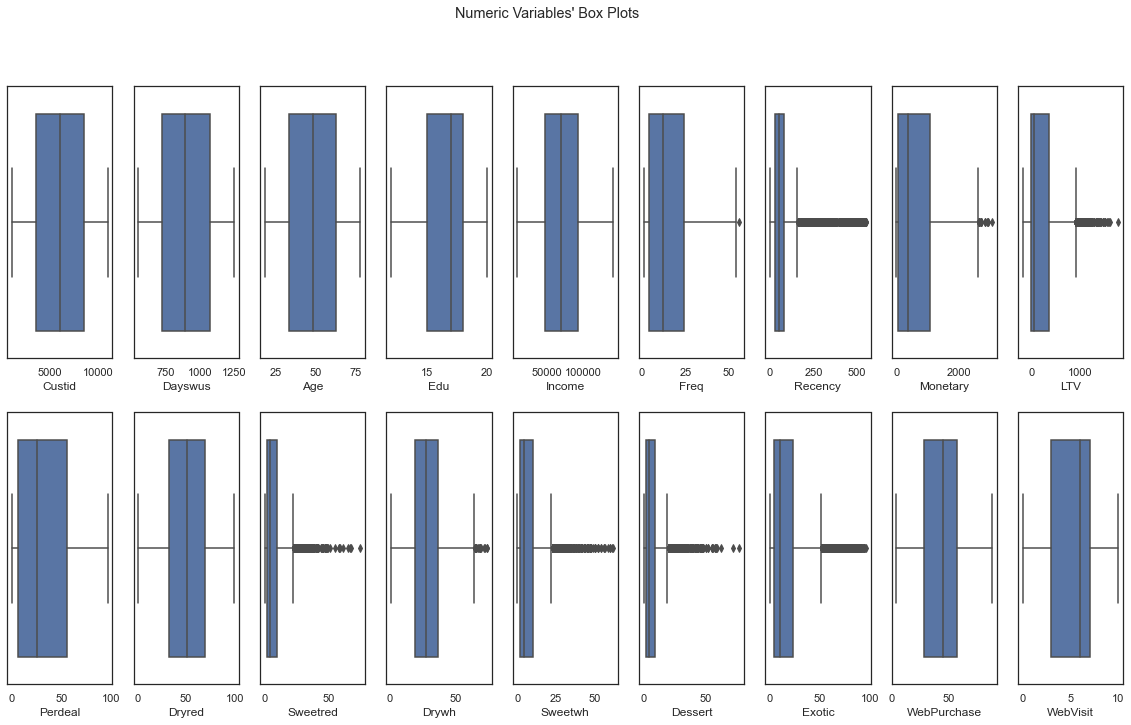

In [9]:
# All Numeric Variables' Box Plots in one figure
sns.set()
sns.set_style("white")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

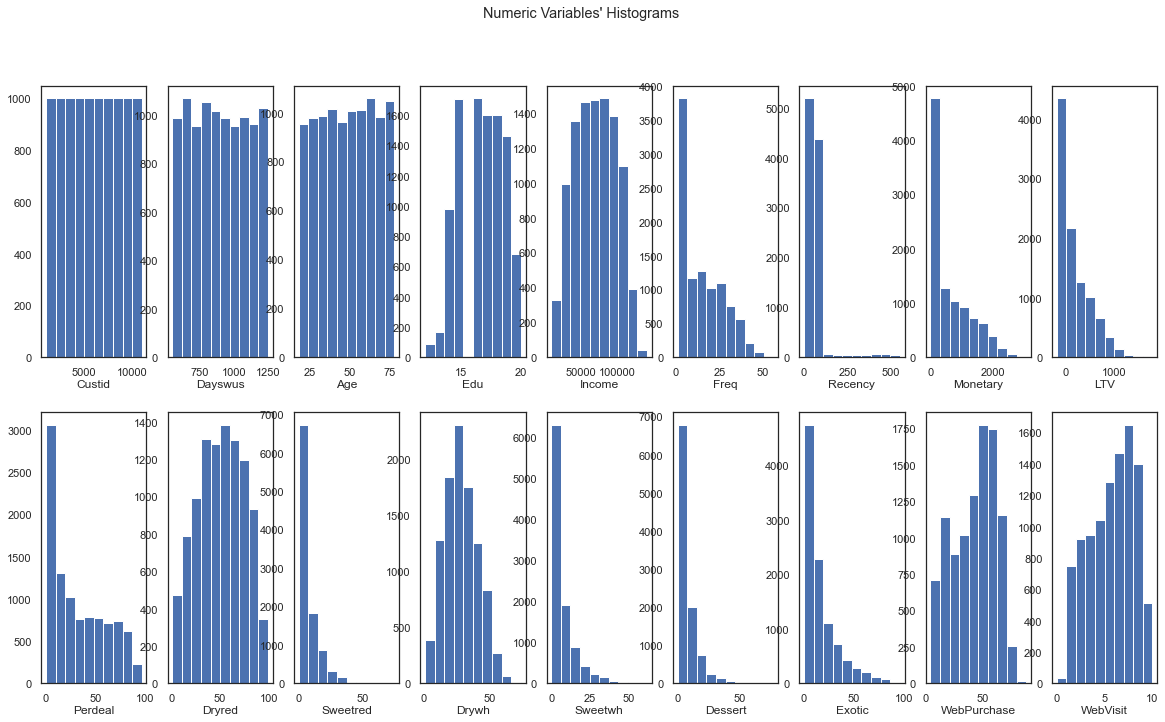

In [10]:
# combine all numerical variables in one figure
sns.set()
sns.set_style("white")

# create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

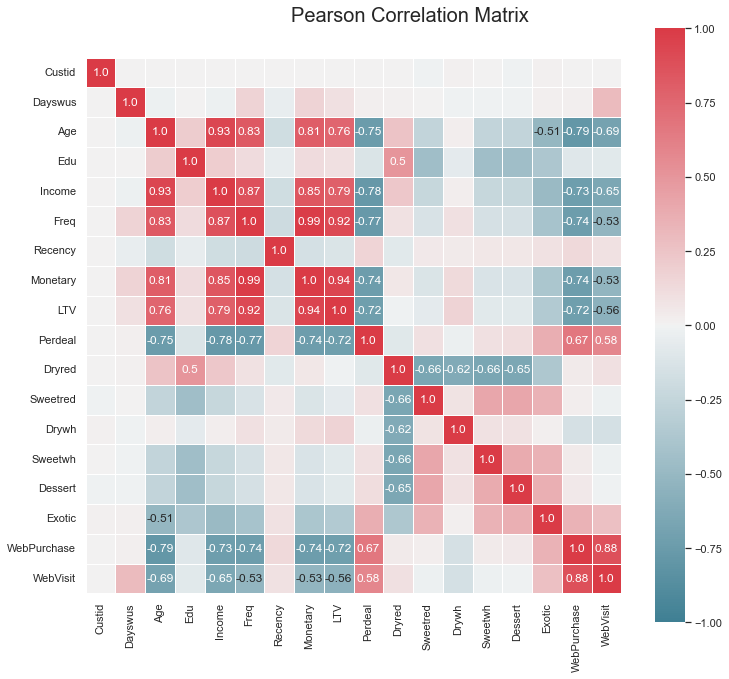

In [11]:
# Prepare figure
fig = plt.figure(figsize=(12, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

## Data Preparation
- select data 
- clean data 
- construct data

In [12]:
# Preserving the original df
df_clean = df.copy()

In [13]:
#drop last row with average values
df_clean = df_clean.drop(index = 10000)

In [14]:
# Check missing values
df_clean.isnull().sum()

Custid         0
Dayswus        0
Age            0
Edu            0
Income         0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
dtype: int64

In [15]:
df_clean.describe()

Custid       Dayswus           Age           Edu         Income  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    6000.50000    898.102000     47.927300     16.739100   69904.358000   
std     2886.89568    202.492789     17.302721      1.876375   27612.233311   
min     1001.00000    550.000000     18.000000     12.000000   10000.000000   
25%     3500.75000    723.750000     33.000000     15.000000   47642.000000   
50%     6000.50000    894.000000     48.000000     17.000000   70012.000000   
75%     8500.25000   1074.000000     63.000000     18.000000   92147.000000   
max    11000.00000   1250.000000     78.000000     20.000000  140628.000000   

               Freq       Recency      Monetary          LTV       Perdeal  \
count  10000.000000  10000.000000  10000.000000  10000.00000  10000.000000   
mean      14.628100     62.406800    622.555200    209.07120     32.397200   
std       11.969073     69.874255    647.135323    291.98604     27.897094   
min        1.000000      0.000000      6.000000   -178.00000      0.000000   
25%        4.000000     26.000000     63.000000     -2.00000      6.000000   
50%       12.000000     52.000000    383.000000     57.00000     25.000000   
75%       24.000000     78.250000   1077.000000    364.00000     56.000000   
max       56.000000    549.000000   3052.000000   1791.00000     97.000000   

             Dryred      Sweetred         Drywh       Sweetwh       Dessert  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      50.382700      7.054500     28.521300      7.069800      6.947400   
std       23.453815      7.866544     12.583957      8.015083      7.879546   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000      2.000000     19.000000      2.000000      2.000000   
50%       51.000000      4.000000     28.000000      4.000000      4.000000   
75%       69.000000     10.000000     37.000000     10.000000      9.000000   
max       99.000000     75.000000     74.000000     62.000000     77.000000   

             Exotic   WebPurchase      WebVisit  
count  10000.000000  10000.000000  10000.000000  
mean      16.546600     42.376200      5.216600  
std       17.247672     18.522062      2.330457  
min        0.000000      4.000000      0.000000  
25%        4.000000     28.000000      3.000000  
50%       10.000000     45.000000      6.000000  
75%       23.000000     57.000000      7.000000  
max       96.000000     88.000000     10.000000

In [16]:
#set CustID as Index
df_clean['Custid'] = df_clean['Custid'].astype('int64')
df_clean.set_index('Custid', inplace = True)
df_clean

Dayswus   Age   Edu    Income  Freq  Recency  Monetary    LTV  \
Custid                                                                  
5325      653.0  55.0  20.0   78473.0  20.0     18.0     826.0  445.0   
3956     1041.0  75.0  18.0  105087.0  36.0     33.0    1852.0  539.0   
3681      666.0  18.0  12.0   27984.0   4.0     56.0      39.0   -7.0   
2829     1049.0  42.0  16.0   61748.0   2.0     46.0      37.0   -6.0   
8788      837.0  47.0  16.0   65789.0   2.0      3.0      36.0    4.0   
...         ...   ...   ...       ...   ...      ...       ...    ...   
1383     1132.0  57.0  20.0   81033.0  19.0     59.0     776.0  187.0   
4070      596.0  66.0  15.0   84714.0  18.0     45.0     720.0  391.0   
7909      619.0  18.0  12.0   40466.0   3.0     65.0      47.0    5.0   
4158     1107.0  33.0  16.0   53661.0   1.0    368.0      15.0    2.0   
4914      979.0  55.0  16.0   94926.0  25.0     28.0    1148.0  293.0   

        Perdeal  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  \
Custid                                                               
5325        7.0    67.0       4.0   26.0      2.0      1.0     1.0   
3956        2.0    49.0       0.0   46.0      1.0      3.0     0.0   
3681       88.0     4.0      29.0   14.0     32.0     21.0    48.0   
2829       70.0    86.0       1.0   11.0      1.0      1.0    55.0   
8788       35.0    85.0       0.0   12.0      2.0      1.0    28.0   
...         ...     ...       ...    ...      ...      ...     ...   
1383       22.0    78.0       0.0   20.0      1.0      1.0    11.0   
4070        5.0    30.0      12.0   36.0     10.0     12.0    13.0   
7909       23.0     6.0      24.0   10.0     38.0     22.0    41.0   
4158       35.0    18.0      13.0   45.0     11.0     13.0    13.0   
4914        7.0    63.0      10.0   13.0     11.0      3.0     4.0   

        WebPurchase  WebVisit  
Custid                         
5325           36.0       5.0  
3956           20.0       4.0  
3681           60.0       8.0  
2829           59.0       7.0  
8788           63.0       6.0  
...             ...       ...  
1383           27.0       4.0  
4070           18.0       2.0  
7909           58.0       5.0  
4158           60.0       6.0  
4914           34.0       5.0  

[10000 rows x 17 columns]

In [17]:
#Sort values
df_clean = df_clean.sort_values(["Custid"])
df_clean

Dayswus   Age   Edu    Income  Freq  Recency  Monetary    LTV  \
Custid                                                                  
1001      789.0  68.0  16.0   90782.0  29.0     66.0    1402.0  699.0   
1002      623.0  78.0  20.0  113023.0  31.0      6.0    1537.0  565.0   
1003      583.0  24.0  18.0   28344.0   4.0     69.0      44.0   -3.0   
1004      893.0  59.0  19.0   93571.0  21.0     10.0     888.0  207.0   
1005     1062.0  59.0  18.0   91852.0  25.0     26.0    1138.0  355.0   
...         ...   ...   ...       ...   ...      ...       ...    ...   
10996     967.0  28.0  17.0   54292.0  23.0     72.0    1011.0  436.0   
10997     637.0  76.0  15.0  125962.0  33.0     75.0    1668.0  476.0   
10998     586.0  69.0  19.0   99628.0  30.0     98.0    1469.0  618.0   
10999     598.0  65.0  14.0  111018.0  28.0      4.0    1350.0  739.0   
11000     771.0  20.0  14.0   26385.0   4.0     24.0      46.0   -3.0   

        Perdeal  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  \
Custid                                                               
1001        3.0    37.0       5.0   44.0     10.0      3.0     2.0   
1002        1.0    55.0       1.0   38.0      4.0      2.0     2.0   
1003       66.0    32.0      19.0   24.0      1.0     24.0    63.0   
1004       12.0    60.0      10.0   19.0      6.0      5.0    15.0   
1005        5.0    59.0       5.0   28.0      4.0      4.0    19.0   
...         ...     ...       ...    ...      ...      ...     ...   
10996       7.0    41.0      11.0   36.0      1.0     11.0    42.0   
10997       3.0    61.0       2.0   25.0      5.0      6.0     1.0   
10998       2.0    46.0       0.0   29.0     11.0     14.0     4.0   
10999       4.0    48.0      16.0   27.0      8.0      1.0     8.0   
11000      68.0     5.0      13.0   21.0     46.0     15.0    63.0   

        WebPurchase  WebVisit  
Custid                         
1001           19.0       4.0  
1002            9.0       1.0  
1003           59.0       7.0  
1004           35.0       5.0  
1005           34.0       6.0  
...             ...       ...  
10996          31.0       6.0  
10997          45.0       5.0  
10998          18.0       3.0  
10999          36.0       4.0  
11000          52.0       5.0  

[10000 rows x 17 columns]

In [18]:
# Check duplicated observations
df_clean.loc[df_clean.duplicated(keep=False), :]

Empty DataFrame
Columns: [Dayswus, Age, Edu, Income, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit]
Index: []

In [19]:
df_clean = df_clean.astype('int64')

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1001 to 11000
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Dayswus      10000 non-null  int64
 1   Age          10000 non-null  int64
 2   Edu          10000 non-null  int64
 3   Income       10000 non-null  int64
 4   Freq         10000 non-null  int64
 5   Recency      10000 non-null  int64
 6   Monetary     10000 non-null  int64
 7   LTV          10000 non-null  int64
 8   Perdeal      10000 non-null  int64
 9   Dryred       10000 non-null  int64
 10  Sweetred     10000 non-null  int64
 11  Drywh        10000 non-null  int64
 12  Sweetwh      10000 non-null  int64
 13  Dessert      10000 non-null  int64
 14  Exotic       10000 non-null  int64
 15  WebPurchase  10000 non-null  int64
 16  WebVisit     10000 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [21]:
df_clean

Dayswus  Age  Edu  Income  Freq  Recency  Monetary  LTV  Perdeal  \
Custid                                                                     
1001        789   68   16   90782    29       66      1402  699        3   
1002        623   78   20  113023    31        6      1537  565        1   
1003        583   24   18   28344     4       69        44   -3       66   
1004        893   59   19   93571    21       10       888  207       12   
1005       1062   59   18   91852    25       26      1138  355        5   
...         ...  ...  ...     ...   ...      ...       ...  ...      ...   
10996       967   28   17   54292    23       72      1011  436        7   
10997       637   76   15  125962    33       75      1668  476        3   
10998       586   69   19   99628    30       98      1469  618        2   
10999       598   65   14  111018    28        4      1350  739        4   
11000       771   20   14   26385     4       24        46   -3       68   

        Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  WebPurchase  \
Custid                                                                   
1001        37         5     44       10        3       2           19   
1002        55         1     38        4        2       2            9   
1003        32        19     24        1       24      63           59   
1004        60        10     19        6        5      15           35   
1005        59         5     28        4        4      19           34   
...        ...       ...    ...      ...      ...     ...          ...   
10996       41        11     36        1       11      42           31   
10997       61         2     25        5        6       1           45   
10998       46         0     29       11       14       4           18   
10999       48        16     27        8        1       8           36   
11000        5        13     21       46       15      63           52   

        WebVisit  
Custid            
1001           4  
1002           1  
1003           7  
1004           5  
1005           6  
...          ...  
10996          6  
10997          5  
10998          3  
10999          4  
11000          5  

[10000 rows x 17 columns]

In [22]:
# Define metric and non-metric features
metric_features = df_clean.columns.to_list()

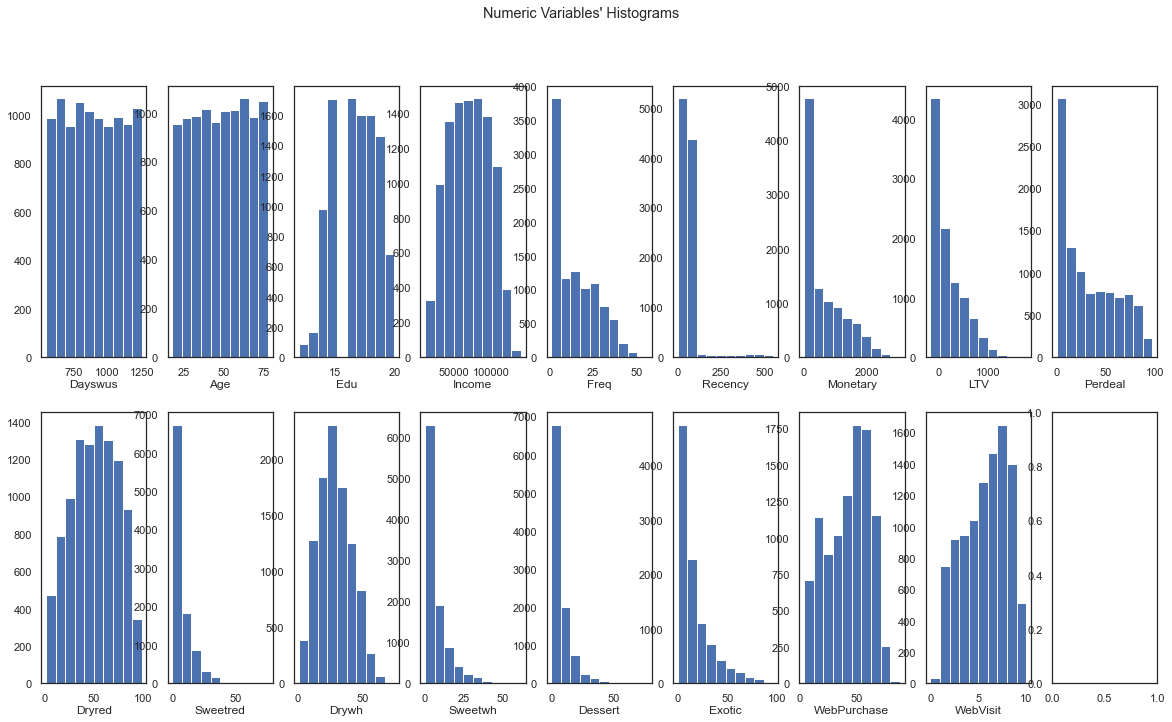

In [23]:
# combine all numerical variables in one figure
sns.set()
sns.set_style("white")

# create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

## Modeling

#### Building An RFM Model 
https://medium.com/@ogunbajoadeyinka/building-an-rfm-model-in-python-3481112a2816

In [24]:
df_rfm = df_clean.copy()
df_rfm = df_rfm[['Freq','Recency','Monetary']]
df_rfm.head()

Freq  Recency  Monetary
Custid                         
1001      29       66      1402
1002      31        6      1537
1003       4       69        44
1004      21       10       888
1005      25       26      1138

In [25]:
#Calculating R and F groups
#Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)

In [26]:
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df_rfm['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df_rfm['Freq'], q=4, labels=f_labels)

In [27]:
# Create new columns R and F 
df_rfm = df_rfm.assign(R = r_groups.values, F = f_groups.values)

In [28]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df_rfm['Monetary'], q=4, labels=m_labels)

In [29]:
# Create new column M
df_rfm = df_rfm.assign(M = m_groups.values)
df_rfm.head()

Freq  Recency  Monetary  R  F  M
Custid                                  
1001      29       66      1402  2  4  4
1002      31        6      1537  4  4  4
1003       4       69        44  2  1  1
1004      21       10       888  4  3  3
1005      25       26      1138  4  4  4

In [30]:
# Concating the RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
df_rfm['RFM_Segment_Concat'] = df_rfm.apply(join_rfm, axis=1)
df_rfm.head()

Freq  Recency  Monetary  R  F  M RFM_Segment_Concat
Custid                                                     
1001      29       66      1402  2  4  4                244
1002      31        6      1537  4  4  4                444
1003       4       69        44  2  1  1                211
1004      21       10       888  4  3  3                433
1005      25       26      1138  4  4  4                444

In [31]:
# Count num of unique segments
df_rfm_count_unique = df_rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(df_rfm_count_unique.sum())
# Calculate RFM_Score
df_rfm['RFM_Score'] = df_rfm[['R','F','M']].sum(axis=1)
print(df_rfm['RFM_Score'].head())

32
Custid
1001    10
1002    12
1003     4
1004    10
1005    12
Name: RFM_Score, dtype: int64


In [32]:
df_rfm.RFM_Score.value_counts()

10    1314
6     1246
7     1209
8     1199
9     1195
5     1113
3      859
4      654
11     608
12     603
Name: RFM_Score, dtype: int64

In [33]:
# Define FMCG_rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 11:
        return 4
    elif ((df['RFM_Score'] >= 9) and (df['RFM_Score'] < 11)):
        return 3
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 9)):
        return 2
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 7)):
        return 1
    else:
        return 0
# Create a new variable RFM_Level
df_rfm['RFM_Level'] = df_rfm.apply(rfm_level, axis=1)
# Printing the header with top 15 rows 
df_rfm.head(15)

Freq  Recency  Monetary  R  F  M RFM_Segment_Concat  RFM_Score  \
Custid                                                                   
1001      29       66      1402  2  4  4                244         10   
1002      31        6      1537  4  4  4                444         12   
1003       4       69        44  2  1  1                211          4   
1004      21       10       888  4  3  3                433         10   
1005      25       26      1138  4  4  4                444         12   
1006       5       65        56  2  2  1                221          5   
1007      11       73       345  2  2  2                222          6   
1008       2       44        41  3  1  1                311          5   
1009      29       75      1401  2  4  4                244         10   
1010       1      153        19  1  1  1                111          3   
1011      19       93       774  1  3  3                133          7   
1012      14       32       491  3  3  3                333          9   
1013      29       54      1407  2  4  4                244         10   
1014       5       28        81  3  2  2                322          7   
1015       1      231        20  1  1  1                111          3   

        RFM_Level  
Custid             
1001            3  
1002            4  
1003            0  
1004            3  
1005            4  
1006            1  
1007            1  
1008            1  
1009            3  
1010            0  
1011            2  
1012            3  
1013            3  
1014            2  
1015            0

In [34]:
# Calculate average values for each RFM_Level, and return a size of each segment 
df_rfm_level_agg = df_rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Freq': 'mean',
    'Monetary': ['mean','sum','count']
}).round(1)
# Print the aggregated dataset
print(df_rfm_level_agg)

          Recency  Freq Monetary               
             mean  mean     mean      sum count
RFM_Level                                      
0           152.3   2.3     35.4    53580  1513
1            50.2   4.9    113.9   268622  2359
2            49.4  12.4    446.7  1075690  2408
3            49.9  24.8   1147.9  2880148  2509
4            25.5  32.2   1608.2  1947512  1211


In [35]:
df_rfm_level_agg

Recency  Freq Monetary               
             mean  mean     mean      sum count
RFM_Level                                      
0           152.3   2.3     35.4    53580  1513
1            50.2   4.9    113.9   268622  2359
2            49.4  12.4    446.7  1075690  2408
3            49.9  24.8   1147.9  2880148  2509
4            25.5  32.2   1608.2  1947512  1211

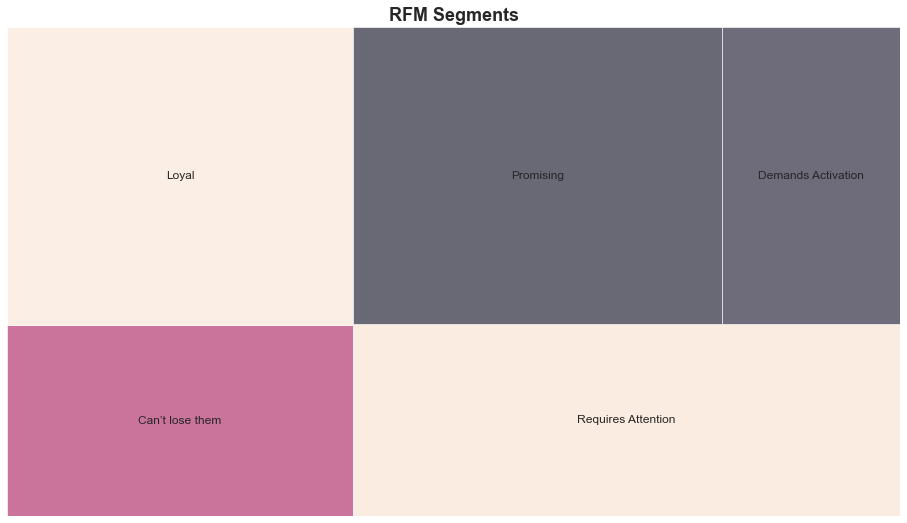

In [36]:
df_rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean','Sum','Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=df_rfm_level_agg['Count'], 
              label=['Can’t lose them',
                     'Loyal',
                     'Requires Attention', 
                     'Promising', 
                     'Demands Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [37]:

fig = px.pie(df_rfm_level_agg, values='Count', names=['Demands Activation','Promising',
                                                      'Requires Attention','Loyal',
                                                      'Can’t lose them'],
             title='RFM Segments', color_discrete_sequence=px.colors.sequential.BuPu,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update(layout_showlegend=False)
fig.show()

In [38]:
fig = px.pie(df_rfm_level_agg, values='Sum', names=['Demands Activation','Promising',
                                                      'Requires Attention','Loyal',
                                                      'Can’t lose them'],
             title='RFM Segments', color_discrete_sequence=px.colors.sequential.BuPu,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update(layout_showlegend=False)
fig.show()

## Clustering for Segment 1 (demographic information and previous engagement)

In [39]:
df_c_info = df_clean.copy()
df_c_info['RFM_Score']=df_rfm['RFM_Score']
df_c_info=df_c_info.drop(columns=['Dryred','Sweetred','Drywh',
                                  'Sweetwh','Dessert','Exotic'])
df_c_info.head()

Dayswus  Age  Edu  Income  Freq  Recency  Monetary  LTV  Perdeal  \
Custid                                                                     
1001        789   68   16   90782    29       66      1402  699        3   
1002        623   78   20  113023    31        6      1537  565        1   
1003        583   24   18   28344     4       69        44   -3       66   
1004        893   59   19   93571    21       10       888  207       12   
1005       1062   59   18   91852    25       26      1138  355        5   

        WebPurchase  WebVisit  RFM_Score  
Custid                                    
1001             19         4         10  
1002              9         1         12  
1003             59         7          4  
1004             35         5         10  
1005             34         6         12

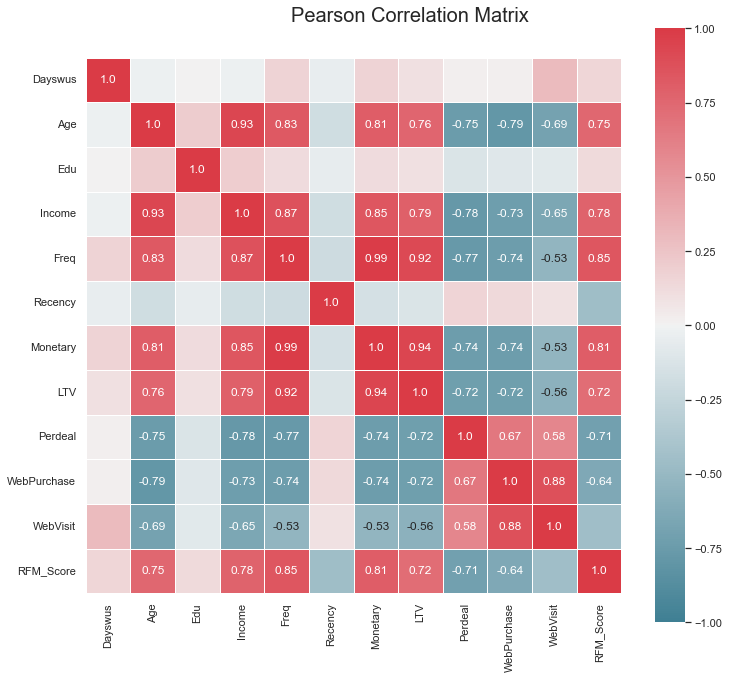

In [40]:
# Prepare figure
fig = plt.figure(figsize=(12, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_c_info.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

 Correlation higer than   90%
1. age & income          93% 
2. freq & monetary        99% 
3. freq & LTV           92% 
4. monetary & LTV       94% 
 
 correlation higer than   85%
1. income & monetary     85%
2. income & freq        87%
3. freq & rfm_score     85%
4. webv & webp        88%

In [41]:
# Drop the features with high correlation score
df_c_info = df_c_info.drop(columns=['Age','Freq','Monetary','WebPurchase'])

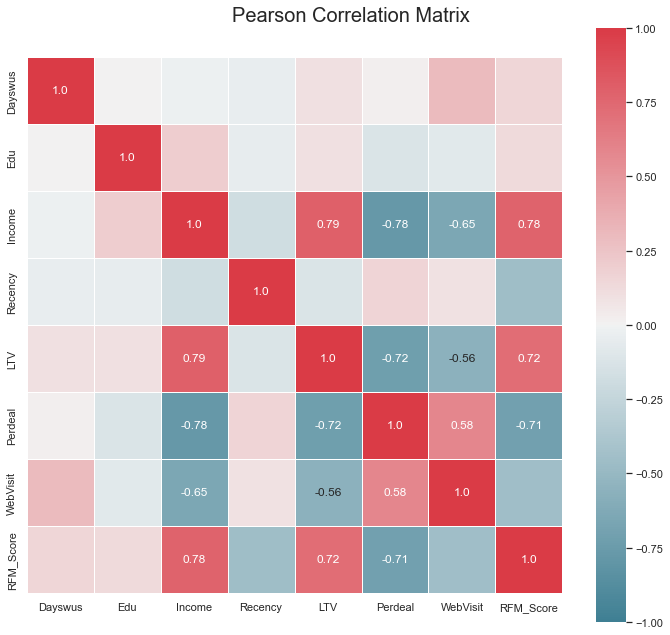

In [42]:
# Prepare figure
fig = plt.figure(figsize=(12, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_c_info.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

#### Data Normalization 

In [43]:
df_c_info_st = df_c_info.copy()
# Use StandardScaler to scale the data
scaled_feat = StandardScaler().fit_transform(df_c_info_st)
df_c_info_st[df_c_info_st.columns]=scaled_feat
df_c_info_st

Dayswus       Edu    Income   Recency       LTV   Perdeal  WebVisit  \
Custid                                                                         
1001   -0.538821 -0.393917  0.756139  0.051426  1.678002 -1.053826 -0.522070   
1002   -1.358645  1.737959  1.561656 -0.807302  1.219053 -1.125521 -1.809436   
1003   -1.556192  0.672021 -1.505218  0.094363 -0.726342  1.204587  0.765296   
1004   -0.025197  1.204990  0.857150 -0.750053 -0.007094 -0.731195 -0.092948   
1005    0.809442  0.672021  0.794892 -0.521059  0.499805 -0.982130  0.336174   
...          ...       ...       ...       ...       ...       ...       ...   
10996   0.340266  0.139052 -0.565443  0.137299  0.777229 -0.910434  0.336174   
10997  -1.289503 -0.926887  2.030276  0.180236  0.914229 -1.053826 -0.092948   
10998  -1.541376  1.204990  1.076520  0.509415  1.400578 -1.089673 -0.951192   
10999  -1.482112 -1.459856  1.489039 -0.835926  1.815002 -1.017978 -0.522070   
11000  -0.627718 -1.459856 -1.576169 -0.549683 -0.726342  1.276283 -0.092948   

        RFM_Score  
Custid             
1001     1.005953  
1002     1.782991  
1003    -1.325160  
1004     1.005953  
1005     1.782991  
...           ...  
10996    0.228915  
10997    1.005953  
10998    0.617434  
10999    1.782991  
11000   -0.548123  

[10000 rows x 8 columns]

### Hierarchical Clustering 

In [44]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df_c_info_st)
hc_labels

array([1, 1, 0, ..., 1, 4, 0], dtype=int64)

In [45]:
# Characterizing the clusters
df_concat = pd.concat(
    (df_c_info_st, pd.Series(hc_labels, name = "labels")),
    axis=1
)
df_concat.groupby('labels').mean()

Dayswus       Edu    Income   Recency       LTV   Perdeal  WebVisit  \
labels                                                                         
0.0     0.016180 -0.011458 -0.016983  0.021169 -0.014654  0.017530  0.034461   
1.0    -0.016870  0.001739 -0.000766 -0.018374  0.003184 -0.004801 -0.006882   
2.0     0.006042 -0.004675  0.014051 -0.013715  0.021649 -0.021957 -0.009149   
3.0     0.050556 -0.022717 -0.019964 -0.049767  0.011145 -0.031920 -0.006891   
4.0    -0.017311  0.047194  0.029273  0.002920  0.006387 -0.007755 -0.064200   

        RFM_Score  
labels             
0.0     -0.026340  
1.0      0.012950  
2.0      0.024929  
3.0      0.032024  
4.0      0.006499

In [46]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    def get_ss(df):
        ss = np.sum(df.var() * (df.shape[0] -1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        # Obtain SSB. Remember: SST = SSW + SSB
        ssb =  sst - np.sum(ssw_labels)
        
        # append the R2 of the given cluster solution
        r2.append(ssb/sst)
        
    return np.array(r2)

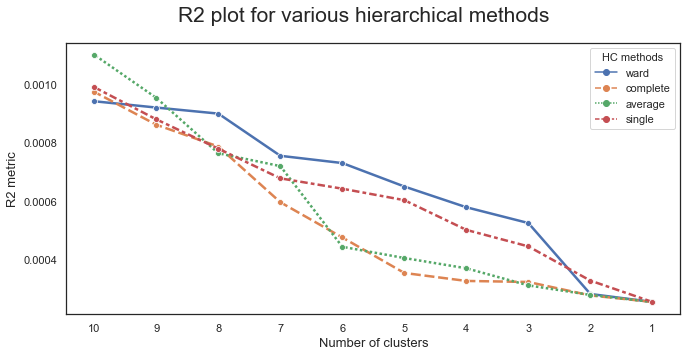

In [47]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]

# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df_c_info_st, link, max_nclus, min_nclus=1, dist="euclidean") 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
sns.set_style("white")

# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [48]:
# Defining the number of clusters

# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = "ward"  # We chose ward linkage, because it shows the best result on the plot above
distance = "euclidean"

# Define the clusterer
hclust = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = linkage, affinity = distance)
hclust.fit_predict(df_c_info_st)

array([9116, 7382, 5455, ...,    3,    1,    0], dtype=int64)

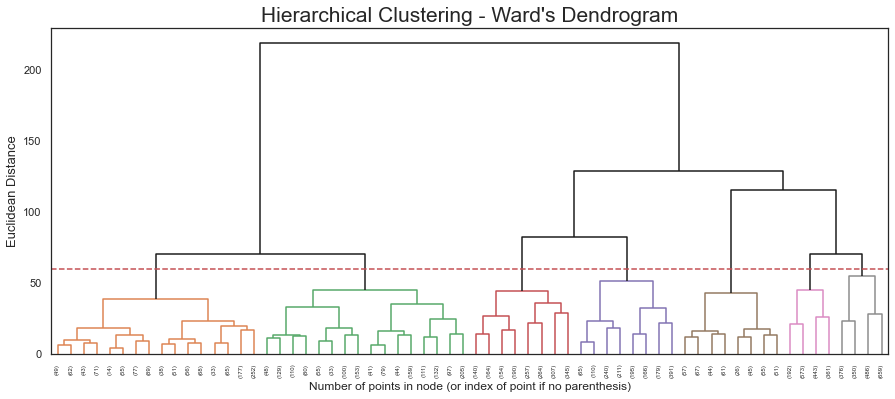

In [49]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
sns.set_style("white")
fig = plt.figure(figsize=(15,6))
# The Dendrogram parameters need to be tuned
y_threshold =60
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [50]:
# Further we create 7 cluster solution, basic on the r2 plot and the dendrogram
linkage = "ward" 
distance = "euclidean"
hclust = AgglomerativeClustering(n_clusters = 7, linkage = linkage, affinity = distance)
hc_labels_6 = hclust.fit_predict(df_c_info_st)

In [51]:
# Characterizing the final clusters
df_c_info_hc = pd.concat((df_c_info_st.reset_index(drop=True), pd.Series(hc_labels_6, name='labels')), axis=1)
df_c_info_hc.groupby('labels').mean()

Dayswus       Edu    Income   Recency       LTV   Perdeal  WebVisit  \
labels                                                                         
0       0.584862 -0.006226 -0.975595 -0.079050 -0.736436  1.094553  0.823323   
1       0.863624  0.129583  1.090726 -0.199218  1.471584 -0.987089 -0.614102   
2       0.875980 -0.311422 -0.204956 -0.235690 -0.399881  0.010489  0.624185   
3      -0.186836 -0.227201 -1.022612  4.088154 -0.719433  0.950209  0.551792   
4      -0.675442  0.055931  0.362091 -0.198788 -0.116167 -0.522388 -0.258847   
5      -0.982923 -0.110279 -0.796904 -0.128082 -0.715406  0.831395  0.231424   
6      -0.809338  0.379776  1.193020 -0.223331  1.089477 -1.039636 -1.383532   

        RFM_Score  
labels             
0       -0.831154  
1        1.143513  
2        0.140083  
3       -1.713679  
4        0.228062  
5       -0.897765  
6        1.019875

### K-Means Clustering

In [52]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus)
    kmclust.fit(df_c_info_st)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

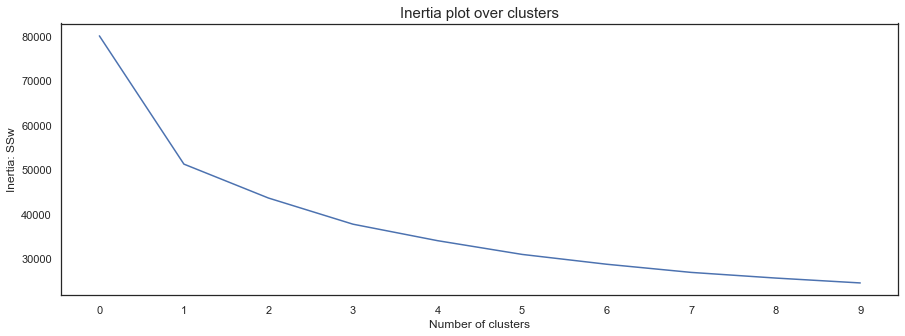

In [53]:
# The inertia plot
plt.figure(figsize=(15,5))
sns.set_style("white")
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.xticks(range(10), )
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.3147543622819062
For n_clusters = 3, the average silhouette_score is : 0.19508192974025515
For n_clusters = 4, the average silhouette_score is : 0.21998801848472885
For n_clusters = 5, the average silhouette_score is : 0.21026466509092243
For n_clusters = 6, the average silhouette_score is : 0.19366274137729989
For n_clusters = 7, the average silhouette_score is : 0.18997939250252355
For n_clusters = 8, the average silhouette_score is : 0.1830900028328327
For n_clusters = 9, the average silhouette_score is : 0.1823704221432542
For n_clusters = 10, the average silhouette_score is : 0.17401985474318915


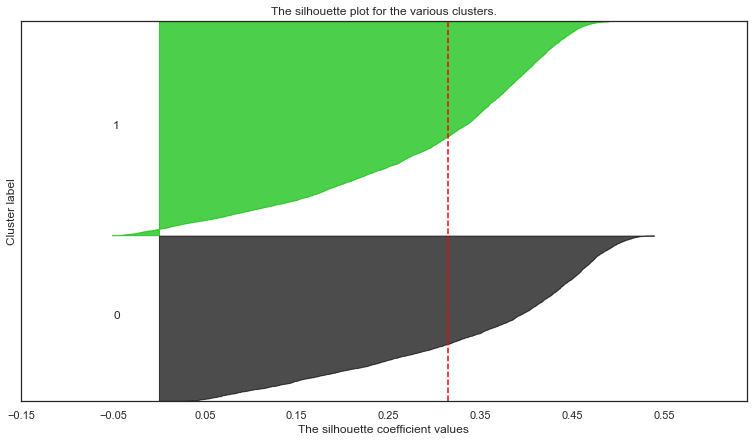

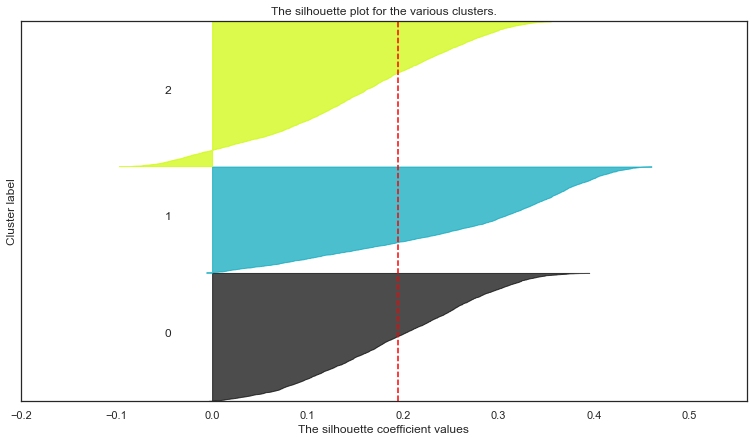

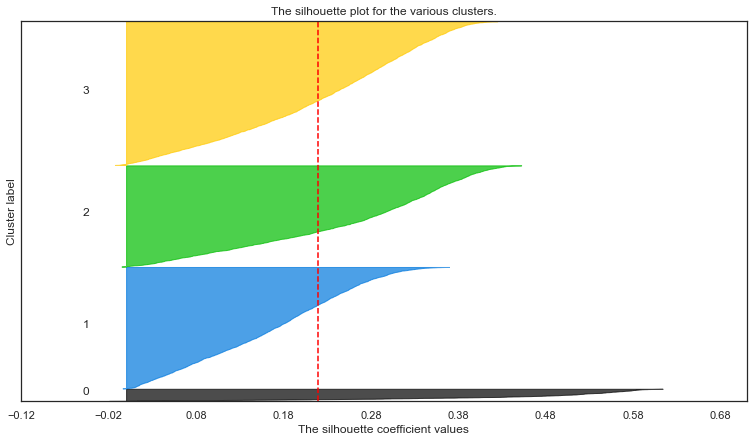

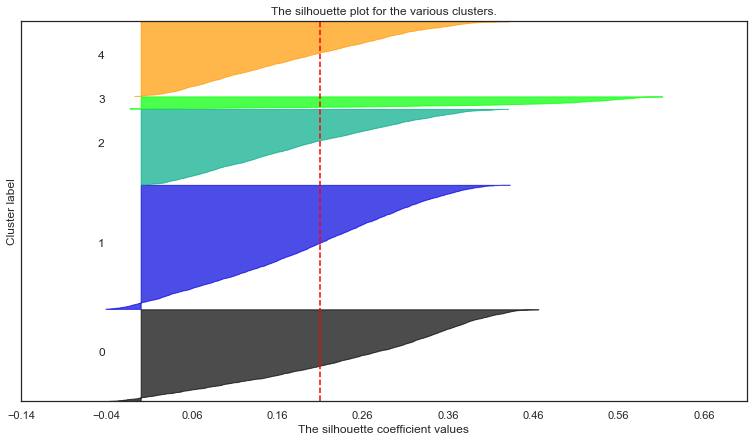

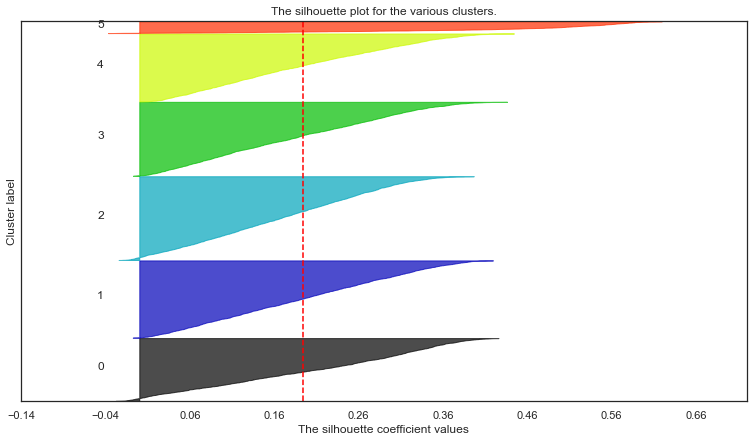

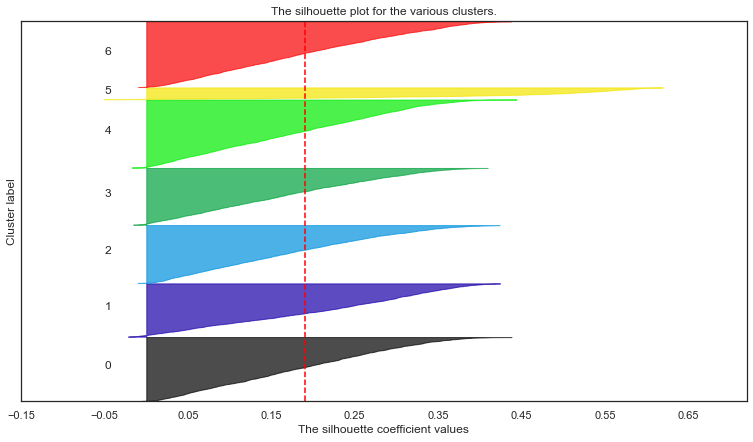

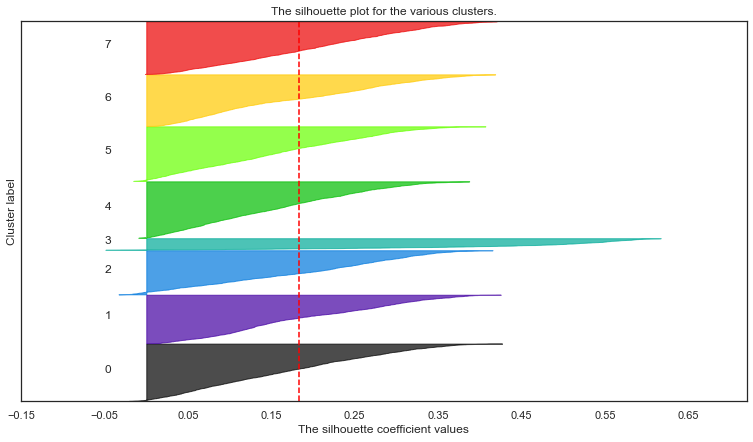

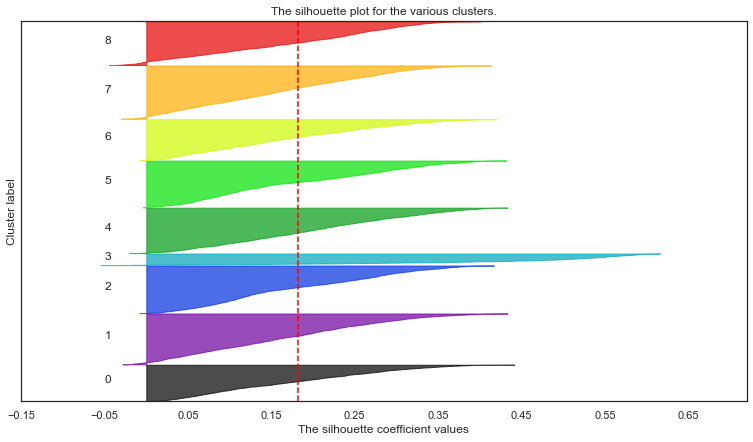

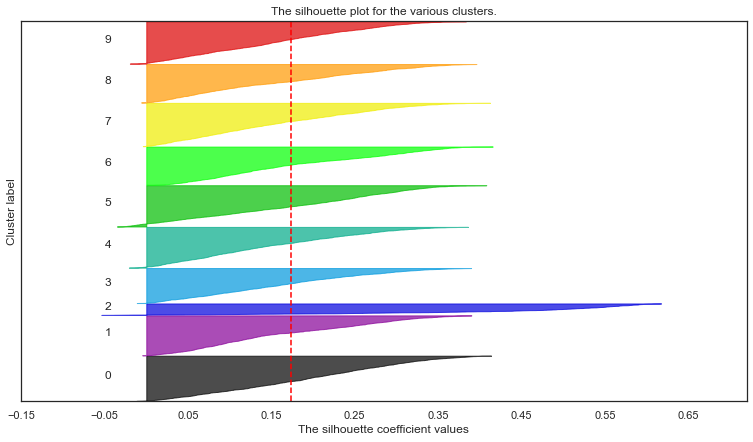

In [54]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))
    sns.set_style("white")

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++',max_iter=2000, n_init=10, random_state=3)
    cluster_labels = kmclust.fit_predict(df_c_info_st)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_c_info_st, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_c_info_st, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

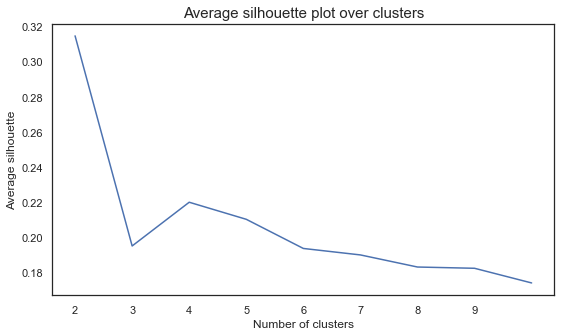

In [55]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
sns.set_style("white")
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.xticks(range(8), range(2, 10))
plt.show()

In [56]:
# 4 cluster solution
number_clusters = 4
kmclust = KMeans(n_clusters=number_clusters, init='k-means++',max_iter=2000, n_init=10, random_state=3)
km_labels = kmclust.fit_predict(df_c_info_st)
km_labels

array([2, 2, 3, ..., 2, 2, 3])

In [57]:
# Characterizing the final clusters
df_c_info_km = pd.concat((df_c_info_st.reset_index(drop=True), pd.Series(km_labels, name='info_labels')), axis=1)
df_c_info_km.groupby('info_labels').mean()

Dayswus       Edu    Income   Recency       LTV   Perdeal  \
info_labels                                                               
0           -0.264003 -0.266468 -1.023399  4.728029 -0.718886  0.912461   
1            0.023002  0.247906  0.205048 -0.200565 -0.208453 -0.385169   
2           -0.008056  0.101979  1.208113 -0.191810  1.378700 -1.047511   
3            0.008634 -0.258605 -0.937200 -0.096475 -0.733909  0.985639   

             WebVisit  RFM_Score  
info_labels                       
0            0.533410  -1.713679  
1            0.103750   0.243211  
2           -1.103326   1.084848  
3            0.644143  -0.824087

In [58]:
df_c_info_km.info_labels.value_counts()

3    3797
1    3207
2    2674
0     322
Name: info_labels, dtype: int64

## Clustering for Segment 2 (wine preferences)

In [59]:
df_WineTasting = df_clean[[  'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert',
       'Exotic']]
df_WineTasting.head()

Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic
Custid                                                   
1001        37         5     44       10        3       2
1002        55         1     38        4        2       2
1003        32        19     24        1       24      63
1004        60        10     19        6        5      15
1005        59         5     28        4        4      19

In [60]:
df_WineTasting_st = df_WineTasting.copy()
# Use StandardScaler to scale the data
scaled_feat = StandardScaler().fit_transform(df_WineTasting_st)
df_WineTasting_st[df_WineTasting_st.columns]=scaled_feat
df_WineTasting_st

Dryred  Sweetred     Drywh   Sweetwh   Dessert    Exotic
Custid                                                            
1001   -0.570627 -0.261182  1.230096  0.365604 -0.500993 -0.843437
1002    0.196878 -0.769690  0.753274 -0.383022 -0.627910 -0.843437
1003   -0.783822  1.518595 -0.359309 -0.757335  2.164268  2.693449
1004    0.410073  0.374453 -0.756660 -0.133480 -0.247159 -0.089675
1005    0.367434 -0.261182 -0.041428 -0.383022 -0.374076  0.142252
...          ...       ...       ...       ...       ...       ...
10996  -0.400070  0.501579  0.594334 -0.757335  0.514345  1.475832
10997   0.452712 -0.642563 -0.279839 -0.258251 -0.120241 -0.901419
10998  -0.186874 -0.896817  0.038042  0.490375  0.895096 -0.727474
10999  -0.101596  1.137214 -0.120898  0.116062 -0.754827 -0.495547
11000  -1.935078  0.755833 -0.597719  4.857361  1.022014  2.693449

[10000 rows x 6 columns]

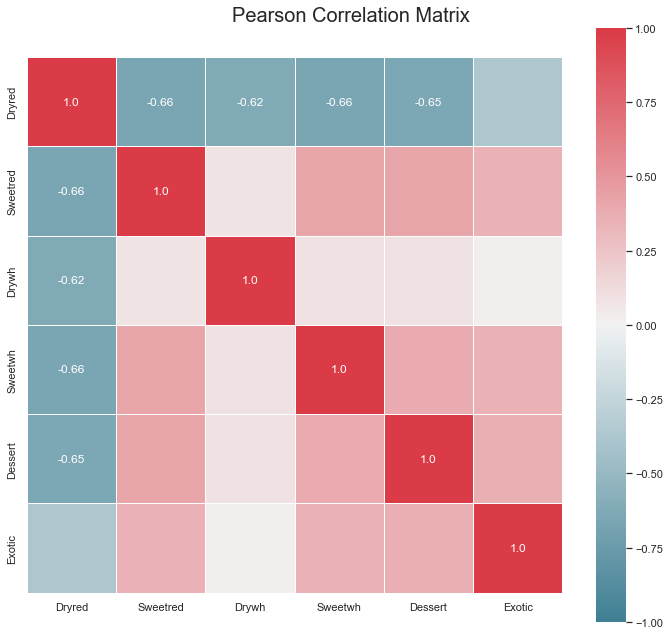

In [61]:
# Prepare figure
fig = plt.figure(figsize=(12, 10))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_WineTasting_st.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

### K-Means Clustering

In [62]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus)
    kmclust.fit(df_WineTasting_st)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

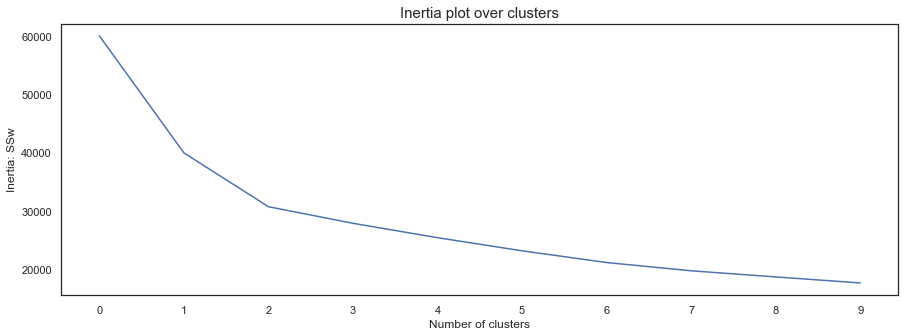

In [63]:
# The inertia plot
plt.figure(figsize=(15,5))
sns.set_style("white")
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.xticks(range(10), )
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.3449238799006994
For n_clusters = 3, the average silhouette_score is : 0.30219366072728054
For n_clusters = 4, the average silhouette_score is : 0.2762980579722947
For n_clusters = 5, the average silhouette_score is : 0.2874061325684141
For n_clusters = 6, the average silhouette_score is : 0.23460862552908088
For n_clusters = 7, the average silhouette_score is : 0.2389710109927662
For n_clusters = 8, the average silhouette_score is : 0.2417823691505495
For n_clusters = 9, the average silhouette_score is : 0.23865324589641218
For n_clusters = 10, the average silhouette_score is : 0.24668854759214687


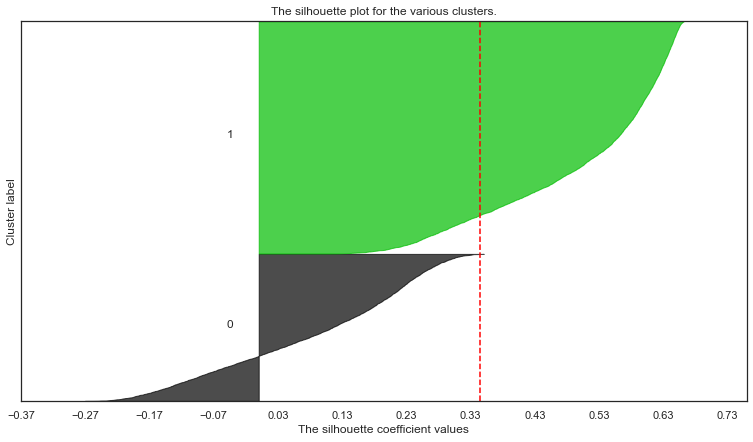

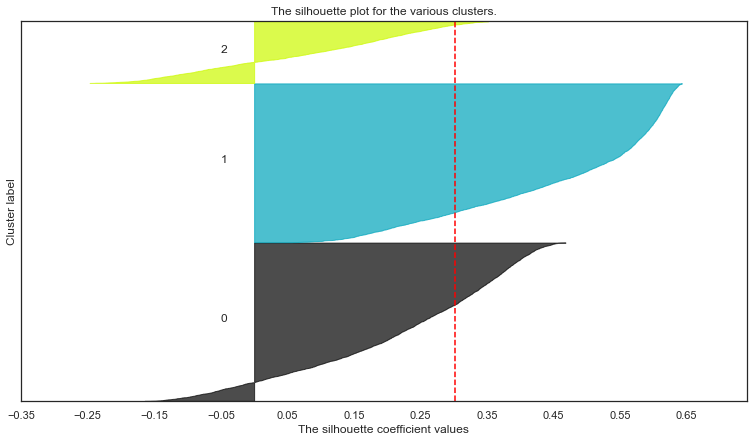

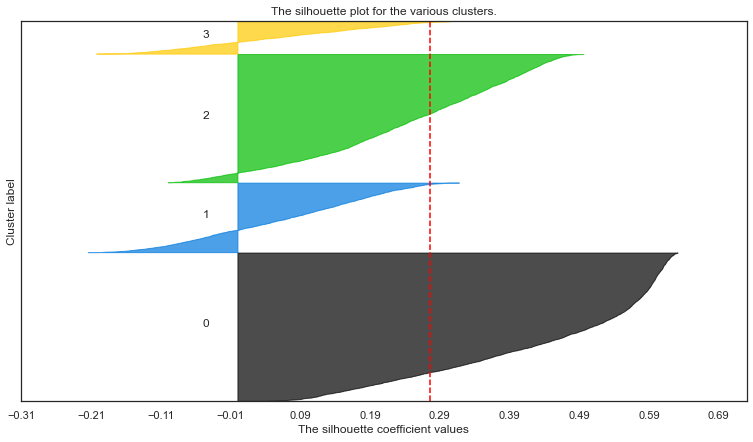

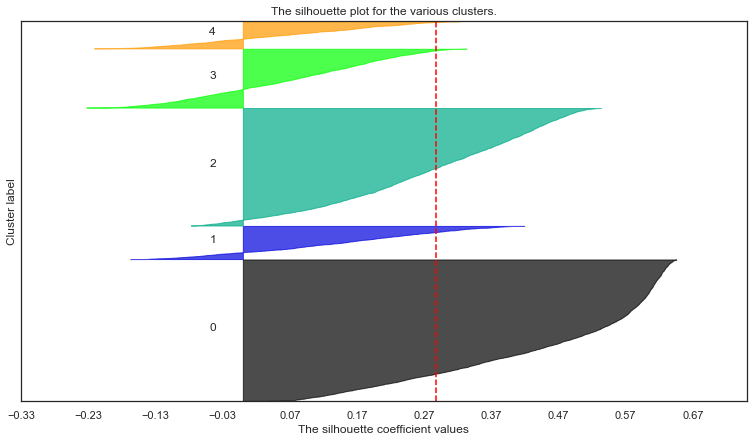

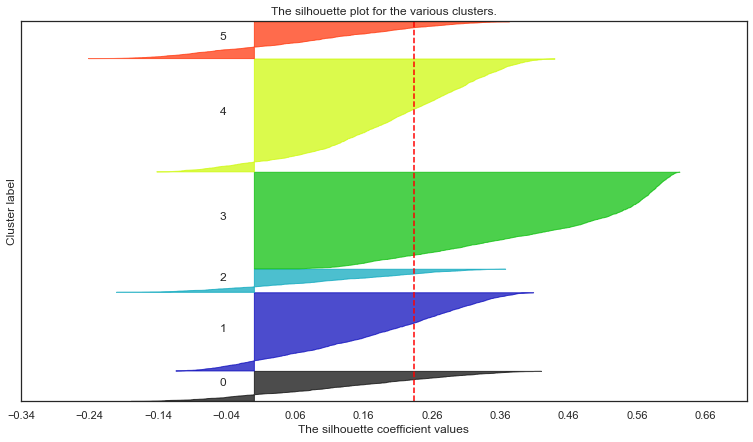

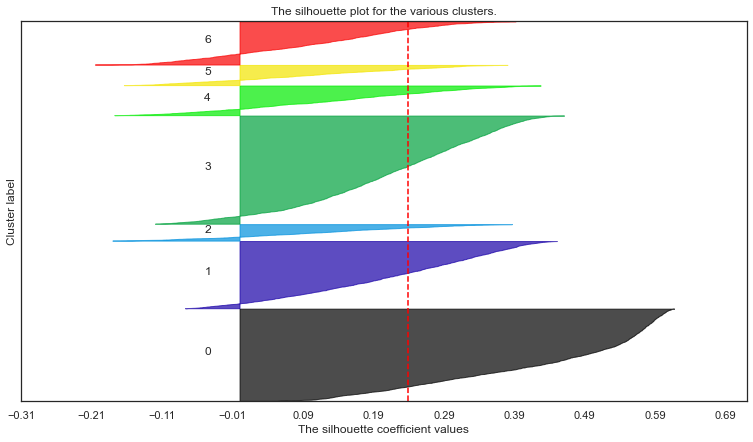

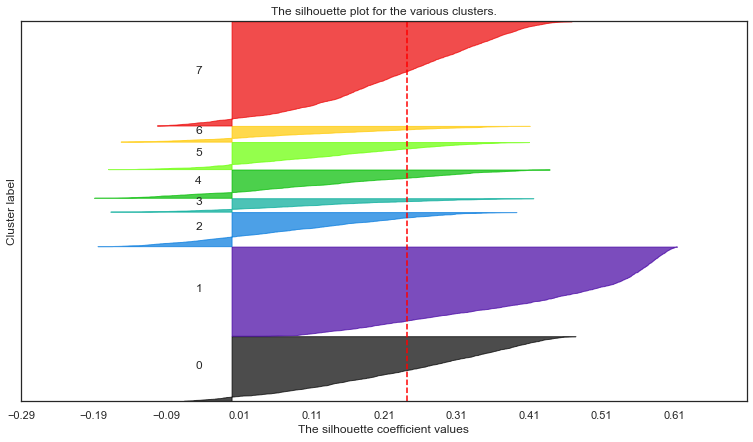

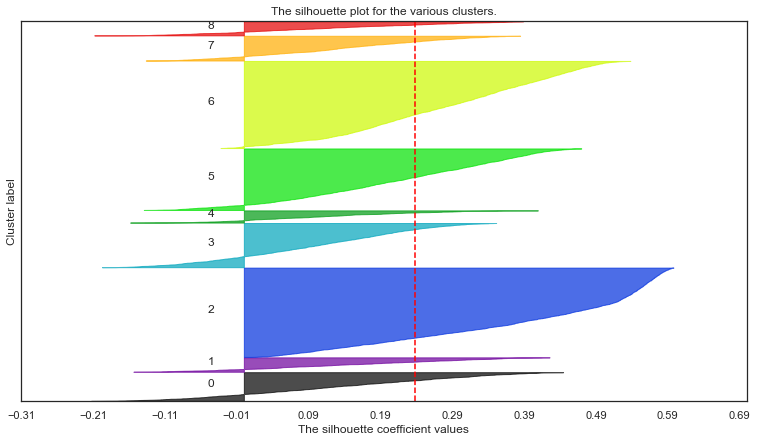

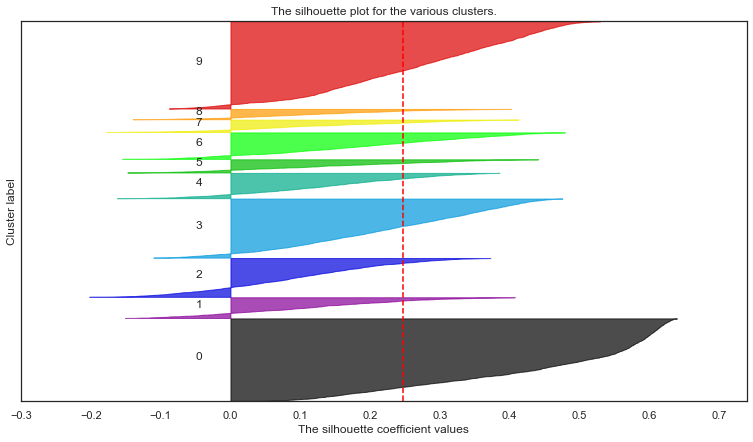

In [64]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))
    sns.set_style("white")

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++',max_iter=2000, n_init=10, random_state=3)
    cluster_labels = kmclust.fit_predict(df_WineTasting_st)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_WineTasting_st, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_WineTasting_st, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

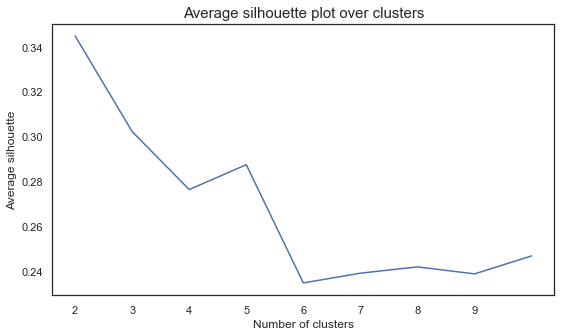

In [65]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
sns.set_style("white")
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.xticks(range(8), range(2, 10))
plt.show()

In [66]:
# 5 cluster solution
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='k-means++',max_iter=2000, n_init=10, random_state=3)
km_labels = kmclust.fit_predict(df_WineTasting_st)
km_labels

array([2, 2, 4, ..., 2, 2, 4])

In [67]:
# Characterizing the final clusters
df_WineTasting_km = pd.concat((df_WineTasting_st.reset_index(drop=True), pd.Series(km_labels, name='taste_labels')), axis=1)
df_WineTasting_km.groupby('taste_labels').mean()

Dryred  Sweetred     Drywh   Sweetwh   Dessert    Exotic
taste_labels                                                            
0             1.037966 -0.588362 -0.838616 -0.578767 -0.578005 -0.359853
1            -0.308374  0.011481  0.517401  0.032407  0.048789  1.716751
2            -0.302143 -0.206004  0.884063 -0.179045 -0.122487 -0.437285
3            -0.974903  1.061804  0.171446  0.911277  0.644688 -0.105139
4            -1.610831  1.642181 -0.460916  1.776142  2.085078  1.898744

In [68]:
df_WineTasting_km.taste_labels.value_counts()

0    3741
2    3108
3    1556
1     877
4     718
Name: taste_labels, dtype: int64

### Density Clustering

In [69]:
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

In [70]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

#### Mean Shift

In [71]:
# The following bandwidth can be automatically detected using (we need to set quantile though)
# Based on distance to nearest neighbors for all observations
bandwidth = estimate_bandwidth(df_WineTasting_st, quantile=0.15, random_state=1, n_jobs=-1)
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_WineTasting_st)

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 6


In [72]:
# Concatenating the labels to df
df_WineTasting_MS = pd.concat([df_WineTasting_st, pd.Series(ms_labels, index=df_WineTasting.index, name="ms_labels")], axis=1)
df_WineTasting_MS.head()

Dryred  Sweetred     Drywh   Sweetwh   Dessert    Exotic  ms_labels
Custid                                                                       
1001   -0.570627 -0.261182  1.230096  0.365604 -0.500993 -0.843437          0
1002    0.196878 -0.769690  0.753274 -0.383022 -0.627910 -0.843437          0
1003   -0.783822  1.518595 -0.359309 -0.757335  2.164268  2.693449          0
1004    0.410073  0.374453 -0.756660 -0.133480 -0.247159 -0.089675          0
1005    0.367434 -0.261182 -0.041428 -0.383022 -0.374076  0.142252          0

In [73]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_WineTasting_st)  # get total sum of squares
ssw_labels = df_WineTasting_MS.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.2515


In [74]:
df_WineTasting_MS.ms_labels.value_counts()

0    9399
3     164
5     160
4     135
2      81
1      61
Name: ms_labels, dtype: int64

#### DBSCAN

In [75]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=10, n_jobs=10)
dbscan_labels = dbscan.fit_predict(df_WineTasting_st)

dbscan_n_clusters = len(np.unique(df_WineTasting_st))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 446


In [76]:
# Concatenating the labels to df
df_WineTasting_DB = pd.concat([df_WineTasting_st, pd.Series(dbscan_labels, index=df_WineTasting.index, name="dbscan_labels")], axis=1)
df_WineTasting_DB

Dryred  Sweetred     Drywh   Sweetwh   Dessert    Exotic  \
Custid                                                               
1001   -0.570627 -0.261182  1.230096  0.365604 -0.500993 -0.843437   
1002    0.196878 -0.769690  0.753274 -0.383022 -0.627910 -0.843437   
1003   -0.783822  1.518595 -0.359309 -0.757335  2.164268  2.693449   
1004    0.410073  0.374453 -0.756660 -0.133480 -0.247159 -0.089675   
1005    0.367434 -0.261182 -0.041428 -0.383022 -0.374076  0.142252   
...          ...       ...       ...       ...       ...       ...   
10996  -0.400070  0.501579  0.594334 -0.757335  0.514345  1.475832   
10997   0.452712 -0.642563 -0.279839 -0.258251 -0.120241 -0.901419   
10998  -0.186874 -0.896817  0.038042  0.490375  0.895096 -0.727474   
10999  -0.101596  1.137214 -0.120898  0.116062 -0.754827 -0.495547   
11000  -1.935078  0.755833 -0.597719  4.857361  1.022014  2.693449   

        dbscan_labels  
Custid                 
1001                0  
1002                0  
1003               -1  
1004                0  
1005                0  
...               ...  
10996               0  
10997               0  
10998               0  
10999               0  
11000              -1  

[10000 rows x 7 columns]

In [77]:
df_WineTasting_DB.dbscan_labels.value_counts()

 0    9311
-1     662
 1      10
 2       9
 3       8
Name: dbscan_labels, dtype: int64

In [78]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_WineTasting_st)  # get total sum of squares
ssw_labels = df_WineTasting_DB.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1801


## Merge engagement labels and behavior labels

In [79]:
df_cluters =df_c_info_km.join(df_WineTasting_km)
df_cluters.head()

Dayswus       Edu    Income   Recency       LTV   Perdeal  WebVisit  \
0 -0.538821 -0.393917  0.756139  0.051426  1.678002 -1.053826 -0.522070   
1 -1.358645  1.737959  1.561656 -0.807302  1.219053 -1.125521 -1.809436   
2 -1.556192  0.672021 -1.505218  0.094363 -0.726342  1.204587  0.765296   
3 -0.025197  1.204990  0.857150 -0.750053 -0.007094 -0.731195 -0.092948   
4  0.809442  0.672021  0.794892 -0.521059  0.499805 -0.982130  0.336174   

   RFM_Score  info_labels    Dryred  Sweetred     Drywh   Sweetwh   Dessert  \
0   1.005953            2 -0.570627 -0.261182  1.230096  0.365604 -0.500993   
1   1.782991            2  0.196878 -0.769690  0.753274 -0.383022 -0.627910   
2  -1.325160            3 -0.783822  1.518595 -0.359309 -0.757335  2.164268   
3   1.005953            1  0.410073  0.374453 -0.756660 -0.133480 -0.247159   
4   1.782991            1  0.367434 -0.261182 -0.041428 -0.383022 -0.374076   

     Exotic  taste_labels  
0 -0.843437             2  
1 -0.843437             2  
2  2.693449             4  
3 -0.089675             0  
4  0.142252             0

In [80]:
# Count label frequencies (contigency table)
df_cluters.groupby(['info_labels', 'taste_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('taste_labels', 'info_labels', 0)

info_labels    0     1     2     3
taste_labels                      
0             72  2001   637  1031
1             48   177    61   591
2             88   662  1417   941
3             61   333   536   626
4             53    34    23   608

In [81]:
# Clusters with low frequency to be merged:
to_merge = [(1,1),(1,3),(1,4),(2,1),(2,4)]

df_centroids = df_cluters.groupby(['info_labels', 'taste_labels']).mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(1, 1): (3, 1),
 (1, 3): (1, 2),
 (1, 4): (1, 3),
 (2, 1): (2, 3),
 (2, 4): (2, 3)}

In [82]:
df_cluters_ = df_cluters.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_cluters_['info_labels']==source[0]) & (df_cluters_['taste_labels']==source[1])
    df_cluters_.loc[mask, 'info_labels'] = target[0]
    df_cluters_.loc[mask, 'taste_labels'] = target[1]

# New contigency table
df_cluters_.groupby(['info_labels', 'taste_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('taste_labels', 'info_labels', 0)

info_labels      0       1       2       3
taste_labels                              
0             72.0  2001.0   637.0  1031.0
1             48.0     NaN     NaN   768.0
2             88.0   995.0  1417.0   941.0
3             61.0    34.0   620.0   626.0
4             53.0     NaN     NaN   608.0

In [83]:
# Clusters with low frequency to be merged:
to_merge = [(1,3)]

df_centroids = df_cluters.groupby(['info_labels', 'taste_labels']).mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(1, 3): (1, 2)}

In [84]:
# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_cluters_['info_labels']==source[0]) & (df_cluters_['taste_labels']==source[1])
    df_cluters_.loc[mask, 'info_labels'] = target[0]
    df_cluters_.loc[mask, 'taste_labels'] = target[1]

# New contigency table
df_cluters_.groupby(['info_labels', 'taste_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('taste_labels', 'info_labels', 0)

info_labels      0       1       2       3
taste_labels                              
0             72.0  2001.0   637.0  1031.0
1             48.0     NaN     NaN   768.0
2             88.0  1029.0  1417.0   941.0
3             61.0     NaN   620.0   626.0
4             53.0     NaN     NaN   608.0

In [85]:
df_cluters=df_cluters_.copy()
df_centroids = df_cluters.groupby(['taste_labels', 'info_labels']).mean()
df_centroids=df_centroids.reset_index().reset_index().set_index(['taste_labels','info_labels'])
cluster_mapper = df_centroids['index'].to_dict()

df_cluters['merged_labels'] = df_cluters.apply(
    lambda row: cluster_mapper[
        (row['taste_labels'], row['info_labels'])
    ], axis=1
)
df_cluters

Dayswus       Edu    Income   Recency       LTV   Perdeal  WebVisit  \
0    -0.538821 -0.393917  0.756139  0.051426  1.678002 -1.053826 -0.522070   
1    -1.358645  1.737959  1.561656 -0.807302  1.219053 -1.125521 -1.809436   
2    -1.556192  0.672021 -1.505218  0.094363 -0.726342  1.204587  0.765296   
3    -0.025197  1.204990  0.857150 -0.750053 -0.007094 -0.731195 -0.092948   
4     0.809442  0.672021  0.794892 -0.521059  0.499805 -0.982130  0.336174   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.340266  0.139052 -0.565443  0.137299  0.777229 -0.910434  0.336174   
9996 -1.289503 -0.926887  2.030276  0.180236  0.914229 -1.053826 -0.092948   
9997 -1.541376  1.204990  1.076520  0.509415  1.400578 -1.089673 -0.951192   
9998 -1.482112 -1.459856  1.489039 -0.835926  1.815002 -1.017978 -0.522070   
9999 -0.627718 -1.459856 -1.576169 -0.549683 -0.726342  1.276283 -0.092948   

      RFM_Score  info_labels    Dryred  Sweetred     Drywh   Sweetwh  \
0      1.005953            2 -0.570627 -0.261182  1.230096  0.365604   
1      1.782991            2  0.196878 -0.769690  0.753274 -0.383022   
2     -1.325160            3 -0.783822  1.518595 -0.359309 -0.757335   
3      1.005953            1  0.410073  0.374453 -0.756660 -0.133480   
4      1.782991            1  0.367434 -0.261182 -0.041428 -0.383022   
...         ...          ...       ...       ...       ...       ...   
9995   0.228915            3 -0.400070  0.501579  0.594334 -0.757335   
9996   1.005953            2  0.452712 -0.642563 -0.279839 -0.258251   
9997   0.617434            2 -0.186874 -0.896817  0.038042  0.490375   
9998   1.782991            2 -0.101596  1.137214 -0.120898  0.116062   
9999  -0.548123            3 -1.935078  0.755833 -0.597719  4.857361   

       Dessert    Exotic  taste_labels  merged_labels  
0    -0.500993 -0.843437             2              8  
1    -0.627910 -0.843437             2              8  
2     2.164268  2.693449             4             14  
3    -0.247159 -0.089675             0              1  
4    -0.374076  0.142252             0              1  
...        ...       ...           ...            ...  
9995  0.514345  1.475832             1              5  
9996 -0.120241 -0.901419             0              2  
9997  0.895096 -0.727474             2              8  
9998 -0.754827 -0.495547             2              8  
9999  1.022014  2.693449             4             14  

[10000 rows x 17 columns]

## Evaluation and Deployment

In [86]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    sns.set_style("white")

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.8,1.2), xycoords='axes fraction', fontsize=40, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=28)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=28)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=30)
    plt.show()

In [87]:
# Calculate average values for each RFM_Level, and return a size of each segment 
df_c_info_km_agg = df_c_info_km.groupby('info_labels').agg({
    'Dayswus': 'mean',
    'Edu': 'mean',
    'Income': 'mean',
    'Recency': 'mean',
    'LTV': 'mean',
    'Perdeal': 'mean',
    'WebVisit': 'mean',
    'RFM_Score': ['mean','count']
}).round(1)
# Print the aggregated dataset
df_c_info_km_agg.columns = ['Dayswus','Edu','Income','Recency','LTV','Perdeal','WebVisit','RFM_Score','count']
df_c_info_km_agg

Dayswus  Edu  Income  Recency  LTV  Perdeal  WebVisit  RFM_Score  \
info_labels                                                                     
0               -0.3 -0.3    -1.0      4.7 -0.7      0.9       0.5       -1.7   
1                0.0  0.2     0.2     -0.2 -0.2     -0.4       0.1        0.2   
2               -0.0  0.1     1.2     -0.2  1.4     -1.0      -1.1        1.1   
3                0.0 -0.3    -0.9     -0.1 -0.7      1.0       0.6       -0.8   

             count  
info_labels         
0              322  
1             3207  
2             2674  
3             3797

In [88]:
fig = go.Figure(layout=go.Layout(plot_bgcolor="white"))
fig.add_trace(go.Scatter(x=df_c_info_km_agg.columns, y=df_c_info_km_agg.loc[0][0:-1],
                    mode='lines',
                    name='Losing'))
fig.add_trace(go.Scatter(x=df_c_info_km_agg.columns, y=df_c_info_km_agg.loc[1][0:-1],
                    mode='lines',
                    name='Normal'))
fig.add_trace(go.Scatter(x=df_c_info_km_agg.columns, y=df_c_info_km_agg.loc[2][0:-1],
                    mode='lines',
                    name='Rich'))
fig.add_trace(go.Scatter(x=df_c_info_km_agg.columns, y=df_c_info_km_agg.loc[3][0:-1],
                    mode='lines',
                    name='Discount'))
fig.show()

In [89]:
fig = px.pie(df_c_info_km_agg, values='count', 
             title='Cluster size', color_discrete_sequence=px.colors.sequential.BuPu,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update(layout_showlegend=False)
fig.show()

In [90]:
df_WineTasting_km

Dryred  Sweetred     Drywh   Sweetwh   Dessert    Exotic  taste_labels
0    -0.570627 -0.261182  1.230096  0.365604 -0.500993 -0.843437             2
1     0.196878 -0.769690  0.753274 -0.383022 -0.627910 -0.843437             2
2    -0.783822  1.518595 -0.359309 -0.757335  2.164268  2.693449             4
3     0.410073  0.374453 -0.756660 -0.133480 -0.247159 -0.089675             0
4     0.367434 -0.261182 -0.041428 -0.383022 -0.374076  0.142252             0
...        ...       ...       ...       ...       ...       ...           ...
9995 -0.400070  0.501579  0.594334 -0.757335  0.514345  1.475832             1
9996  0.452712 -0.642563 -0.279839 -0.258251 -0.120241 -0.901419             0
9997 -0.186874 -0.896817  0.038042  0.490375  0.895096 -0.727474             2
9998 -0.101596  1.137214 -0.120898  0.116062 -0.754827 -0.495547             2
9999 -1.935078  0.755833 -0.597719  4.857361  1.022014  2.693449             4

[10000 rows x 7 columns]

In [91]:
# Calculate average values for each RFM_Level, and return a size of each segment 
df_WineTasting_km_agg = df_WineTasting_km.groupby('taste_labels').agg({
    'Dryred': 'mean',
    'Sweetred': 'mean',
    'Drywh': 'mean',
    'Sweetwh': 'mean',
    'Dessert': 'mean',
    'Exotic': ['mean','count'],
}).round(1)
# Print the aggregated dataset
df_WineTasting_km_agg.columns = ['Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic','count']
df_WineTasting_km_agg

Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  count
taste_labels                                                          
0                1.0      -0.6   -0.8     -0.6     -0.6    -0.4   3741
1               -0.3       0.0    0.5      0.0      0.0     1.7    877
2               -0.3      -0.2    0.9     -0.2     -0.1    -0.4   3108
3               -1.0       1.1    0.2      0.9      0.6    -0.1   1556
4               -1.6       1.6   -0.5      1.8      2.1     1.9    718

In [92]:
fig = go.Figure(layout=go.Layout(plot_bgcolor="white"))
fig.add_trace(go.Scatter(x=df_WineTasting_km_agg.columns, y=df_WineTasting_km_agg.loc[0][0:-1],
                    mode='lines',
                    name='Dry red'))
fig.add_trace(go.Scatter(x=df_WineTasting_km_agg.columns, y=df_WineTasting_km_agg.loc[1][0:-1],
                    mode='lines',
                    name='Exotic'))
fig.add_trace(go.Scatter(x=df_WineTasting_km_agg.columns, y=df_WineTasting_km_agg.loc[2][0:-1],
                    mode='lines',
                    name='Dry white'))
fig.add_trace(go.Scatter(x=df_WineTasting_km_agg.columns, y=df_WineTasting_km_agg.loc[3][0:-1],
                    mode='lines',
                    name='Sweet'))
fig.add_trace(go.Scatter(x=df_WineTasting_km_agg.columns, y=df_WineTasting_km_agg.loc[4][0:-1],
                    mode='lines',
                    name='Not dry'))
fig.show()

In [93]:
fig = px.pie(df_WineTasting_km_agg, values='count', 
             title='Cluster size', color_discrete_sequence=px.colors.sequential.BuPu,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update(layout_showlegend=False)
fig.show()

In [94]:
# Calculate average values for each RFM_Level, and return a size of each segment 
df_cluters_agg = df_cluters.drop(columns=['info_labels','taste_labels']).groupby('merged_labels').agg({
    'Dayswus': 'mean',
    'Edu': 'mean',
    'Income': 'mean',
    'Recency': 'mean',
    'LTV': 'mean',
    'Perdeal': 'mean',
    'WebVisit': 'mean',
    'RFM_Score': 'mean',
    'Dryred': 'mean',
    'Sweetred': 'mean',
    'Drywh': 'mean',
    'Sweetwh': 'mean',
    'Dessert': 'mean',
    'Exotic': ['mean','count'],
}).round(1)
# Print the aggregated dataset
df_cluters_agg.columns = ['Dayswus','Edu','Income','Recency','LTV','Perdeal','WebVisit','RFM_Score','Dryred','Sweetred','Drywh','Sweetwh','Dessert','Exotic','count']
df_cluters_agg

Dayswus  Edu  Income  Recency  LTV  Perdeal  WebVisit  \
merged_labels                                                          
0                 -0.5  0.4    -0.7      4.7 -0.7      1.0       0.3   
1                  0.0  0.5     0.2     -0.2 -0.2     -0.4       0.2   
2                  0.1  0.5     1.2     -0.2  1.4     -1.0      -0.7   
3                 -0.0  0.3    -0.6     -0.1 -0.8      1.1       0.6   
4                 -0.1 -0.4    -1.1      4.5 -0.7      1.0       0.6   
5                  0.0 -0.3    -0.7     -0.1 -0.6      0.7       0.5   
6                 -0.2  0.1    -0.9      4.6 -0.7      1.0       0.6   
7                 -0.0 -0.1     0.2     -0.2 -0.2     -0.4      -0.2   
8                 -0.0  0.2     1.2     -0.2  1.5     -1.1      -1.2   
9                  0.0  0.1    -0.9     -0.1 -0.7      1.0       0.7   
10                -0.3 -0.6    -1.2      5.0 -0.7      0.7       0.6   
11                -0.1 -0.7     1.2     -0.2  1.2     -1.0      -1.3   
12                -0.0 -0.7    -1.1     -0.1 -0.7      0.8       0.6   
13                -0.1 -1.3    -1.4      4.9 -0.7      0.8       0.5   
14                 0.0 -1.4    -1.4     -0.1 -0.7      0.9       0.6   

               RFM_Score  Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  \
merged_labels                                                                 
0                   -1.7     1.0      -0.6   -0.7     -0.6     -0.6    -0.1   
1                    0.3     1.1      -0.6   -1.0     -0.6     -0.6    -0.4   
2                    1.1     0.8      -0.5   -0.6     -0.5     -0.5    -0.6   
3                   -0.7     1.0      -0.6   -0.7     -0.6     -0.6    -0.2   
4                   -1.7    -0.4       0.2    0.7      0.1     -0.0     1.9   
5                   -0.6    -0.3      -0.0    0.5      0.0      0.0     1.7   
6                   -1.7    -0.4      -0.2    1.0     -0.1     -0.1    -0.1   
7                    0.2    -0.4       0.2    0.3      0.2      0.2    -0.3   
8                    1.1    -0.4      -0.2    1.0     -0.2     -0.1    -0.6   
9                   -0.8    -0.3      -0.2    1.0     -0.2     -0.2    -0.2   
10                  -1.7    -1.2       1.3    0.4      1.1      0.6     0.1   
11                   1.0    -0.9       0.9    0.2      0.8      0.6    -0.1   
12                  -0.9    -1.1       1.2    0.3      1.0      0.7     0.1   
13                  -1.7    -1.7       1.5   -0.4      1.8      2.2     1.6   
14                  -0.9    -1.6       1.7   -0.5      1.8      2.1     2.0   

               count  
merged_labels         
0                 72  
1               2001  
2                637  
3               1031  
4                 48  
5                768  
6                 88  
7               1029  
8               1417  
9                941  
10                61  
11               620  
12               626  
13                53  
14               608

In [95]:
# name the merged label 
df_cluters_agg1 = df_cluters[['info_labels','taste_labels','merged_labels']].groupby('merged_labels').agg({
    'info_labels': 'unique',
    'taste_labels': 'unique',})

print(df_cluters_agg1)

              info_labels taste_labels
merged_labels                         
0                     [0]          [0]
1                     [1]          [0]
2                     [2]          [0]
3                     [3]          [0]
4                     [0]          [1]
5                     [3]          [1]
6                     [0]          [2]
7                     [1]          [2]
8                     [2]          [2]
9                     [3]          [2]
10                    [0]          [3]
11                    [2]          [3]
12                    [3]          [3]
13                    [0]          [4]
14                    [3]          [4]


In [96]:
fig = go.Figure(layout=go.Layout(plot_bgcolor="white"))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[0][0:-1],
                    mode='lines',
                    name='Losing 0 Dry red'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[1][0:-1],
                    mode='lines',
                    name='Normal 1 Dry red'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[2][0:-1],
                    mode='lines',
                    name='Rich 2 Dry red'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[3][0:-1],
                    mode='lines',
                    name='Discount 3 Dry red'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[4][0:-1],
                    mode='lines',
                    name='Losing 4 Exotic'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[5][0:-1],
                    mode='lines',
                    name='Discount 5 Exotic'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[6][0:-1],
                    mode='lines',
                    name='Losing 6 Dry white'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[7][0:-1],
                    mode='lines',
                    name='Normal 7 Dry white'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[8][0:-1],
                    mode='lines',
                    name='Rich 8 Dry white'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[9][0:-1],
                    mode='lines',
                    name='Discount 9 Dry white'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[10][0:-1],
                    mode='lines',
                    name='Losing 10 Sweet'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[11][0:-1],
                    mode='lines',
                    name='Rich 11 Sweet'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[12][0:-1],
                    mode='lines',
                    name='Discount 12 Sweet'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[13][0:-1],
                    mode='lines',
                    name='Losing 13 Not dry'))
fig.add_trace(go.Scatter(x=df_cluters_agg.columns, y=df_cluters_agg.loc[14][0:-1],
                    mode='lines',
                    name='Discount 14 Not dry'))
fig.show()

In [97]:
fig = px.pie(df_cluters_agg, values='count', 
             title='Cluster size', color_discrete_sequence=px.colors.sequential.BuPu,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

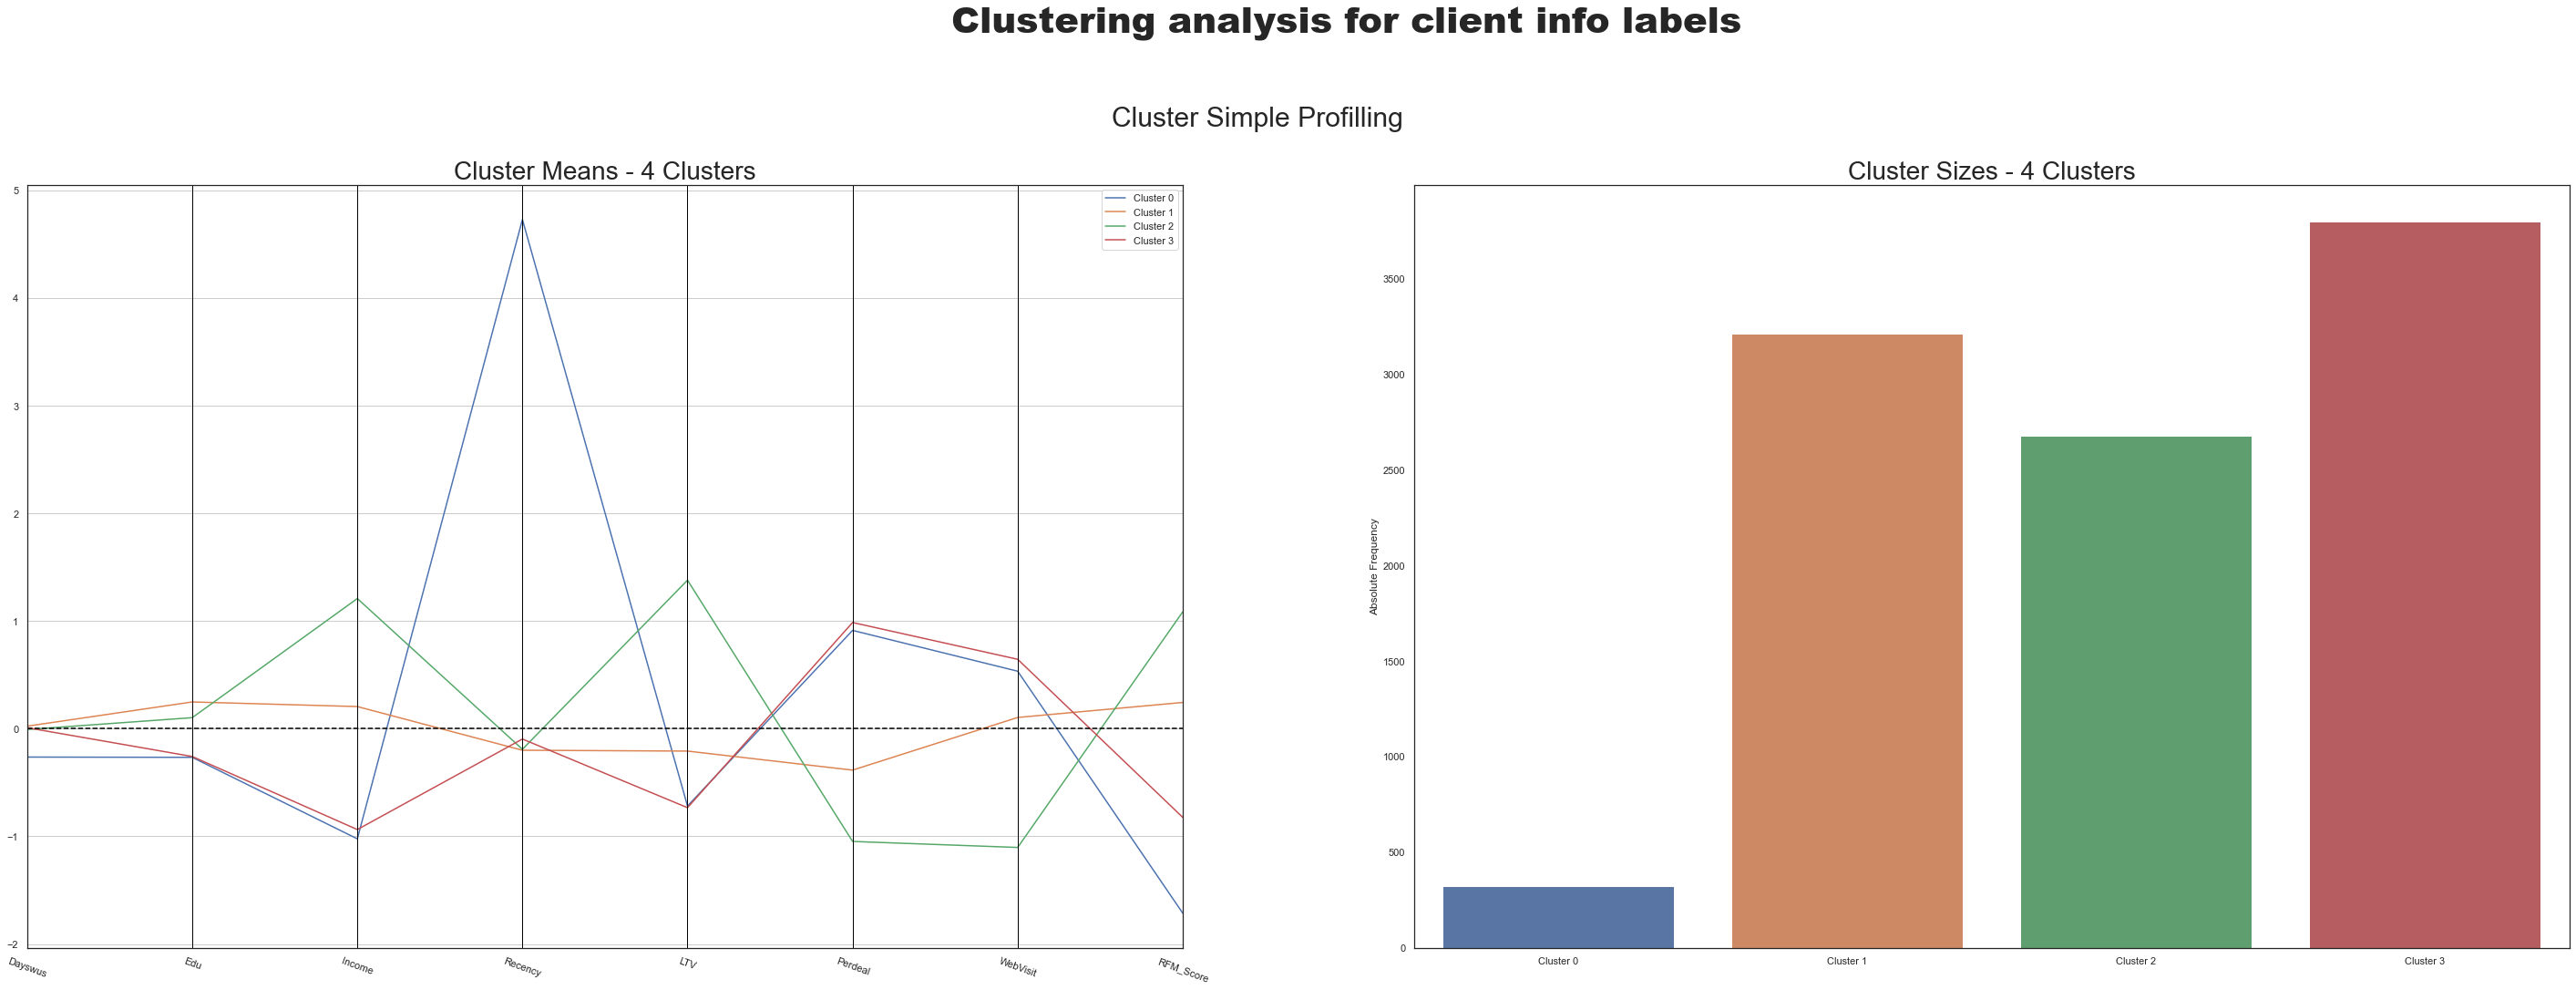

In [98]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_c_info_km, 
    label_columns = ['info_labels'], 
    figsize = (50, 15), 
    compar_titles = ["Clustering analysis for client info labels"]
)

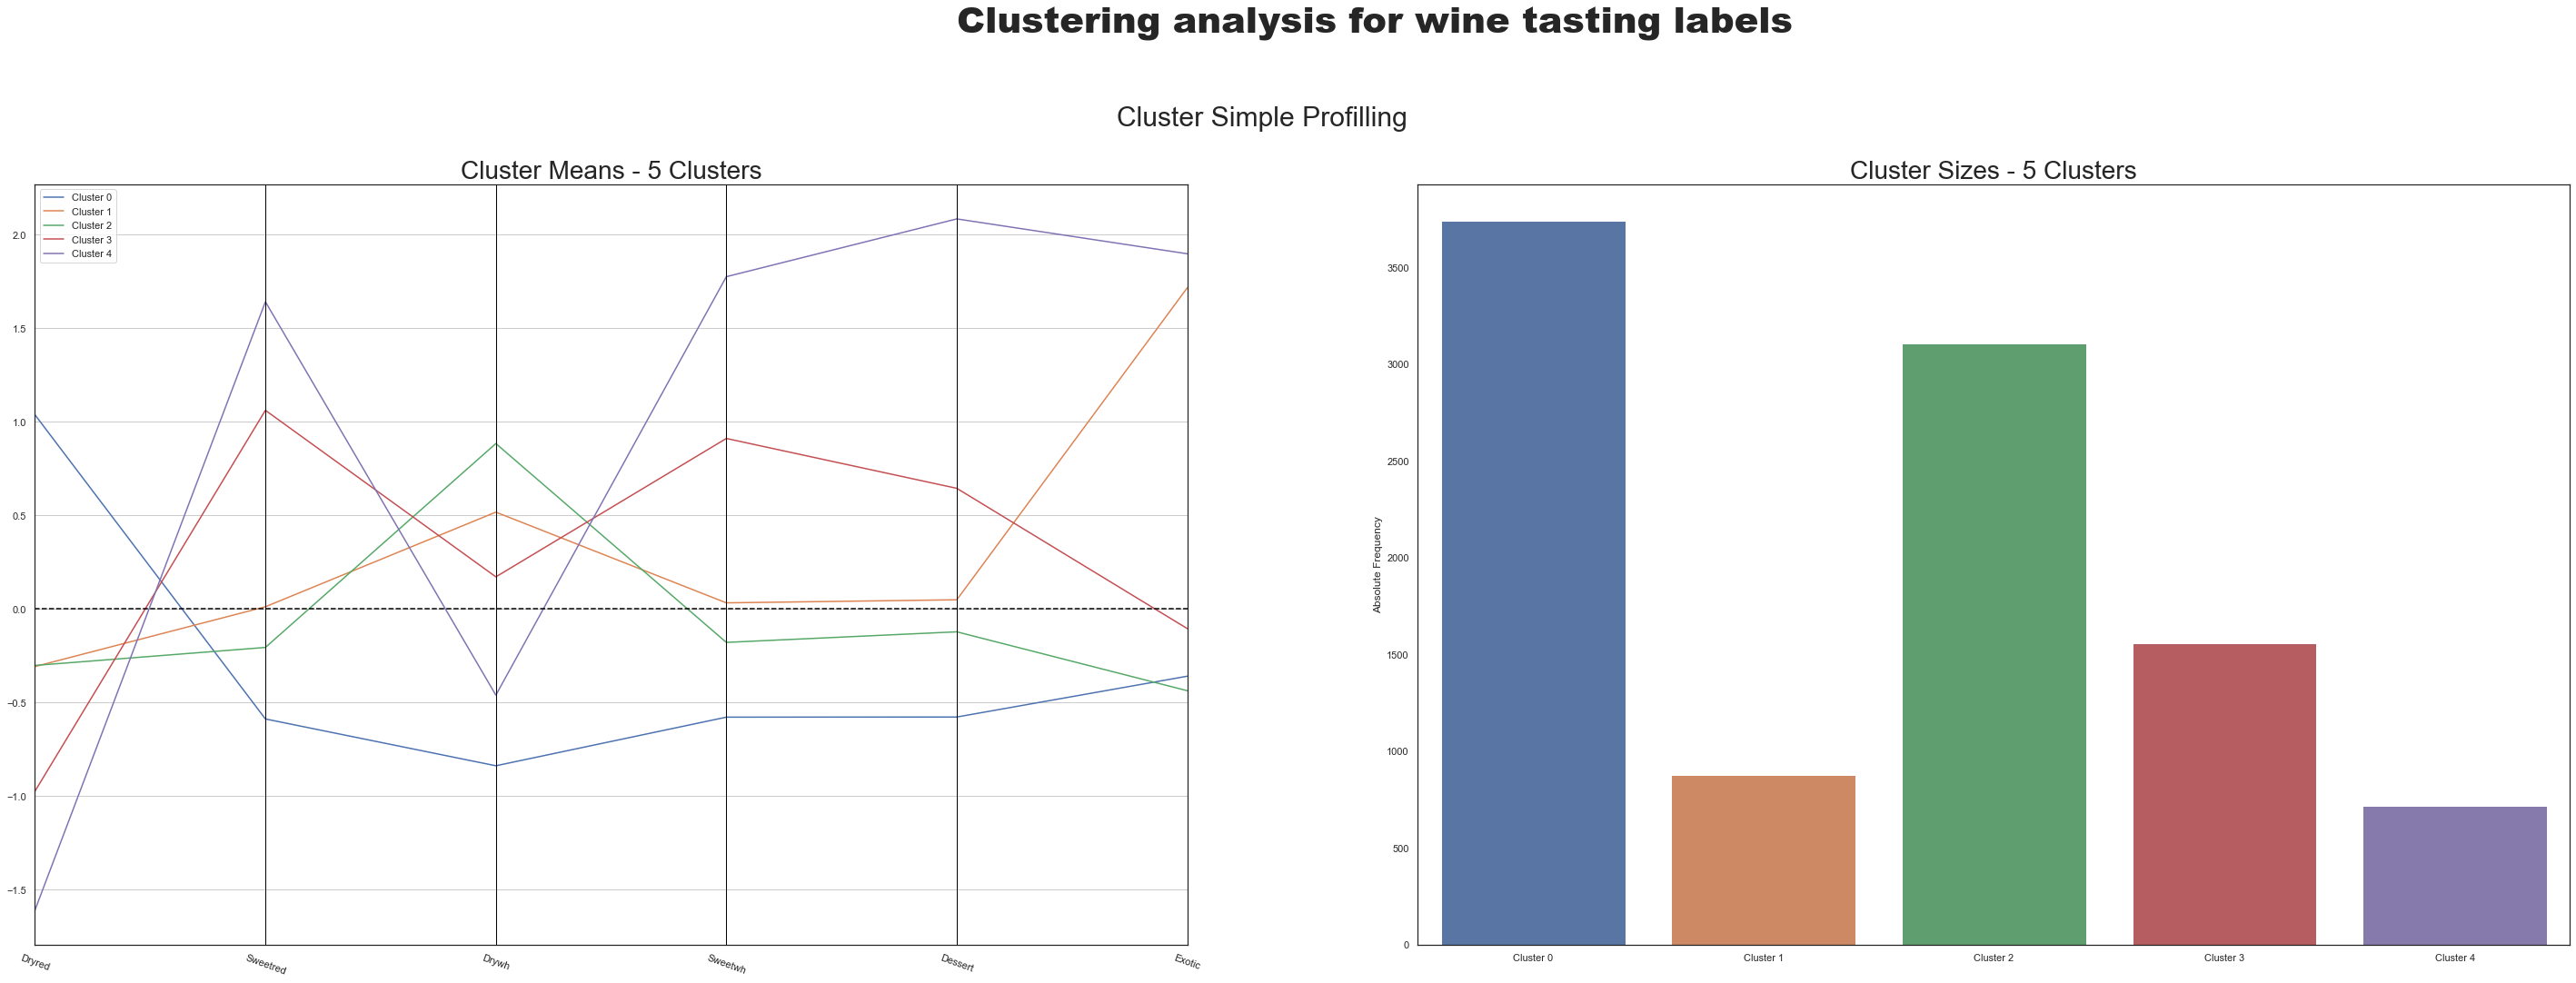

In [99]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_WineTasting_km, 
    label_columns = ['taste_labels'], 
    figsize = (50, 15), 
    compar_titles = ["Clustering analysis for wine tasting labels"]
)

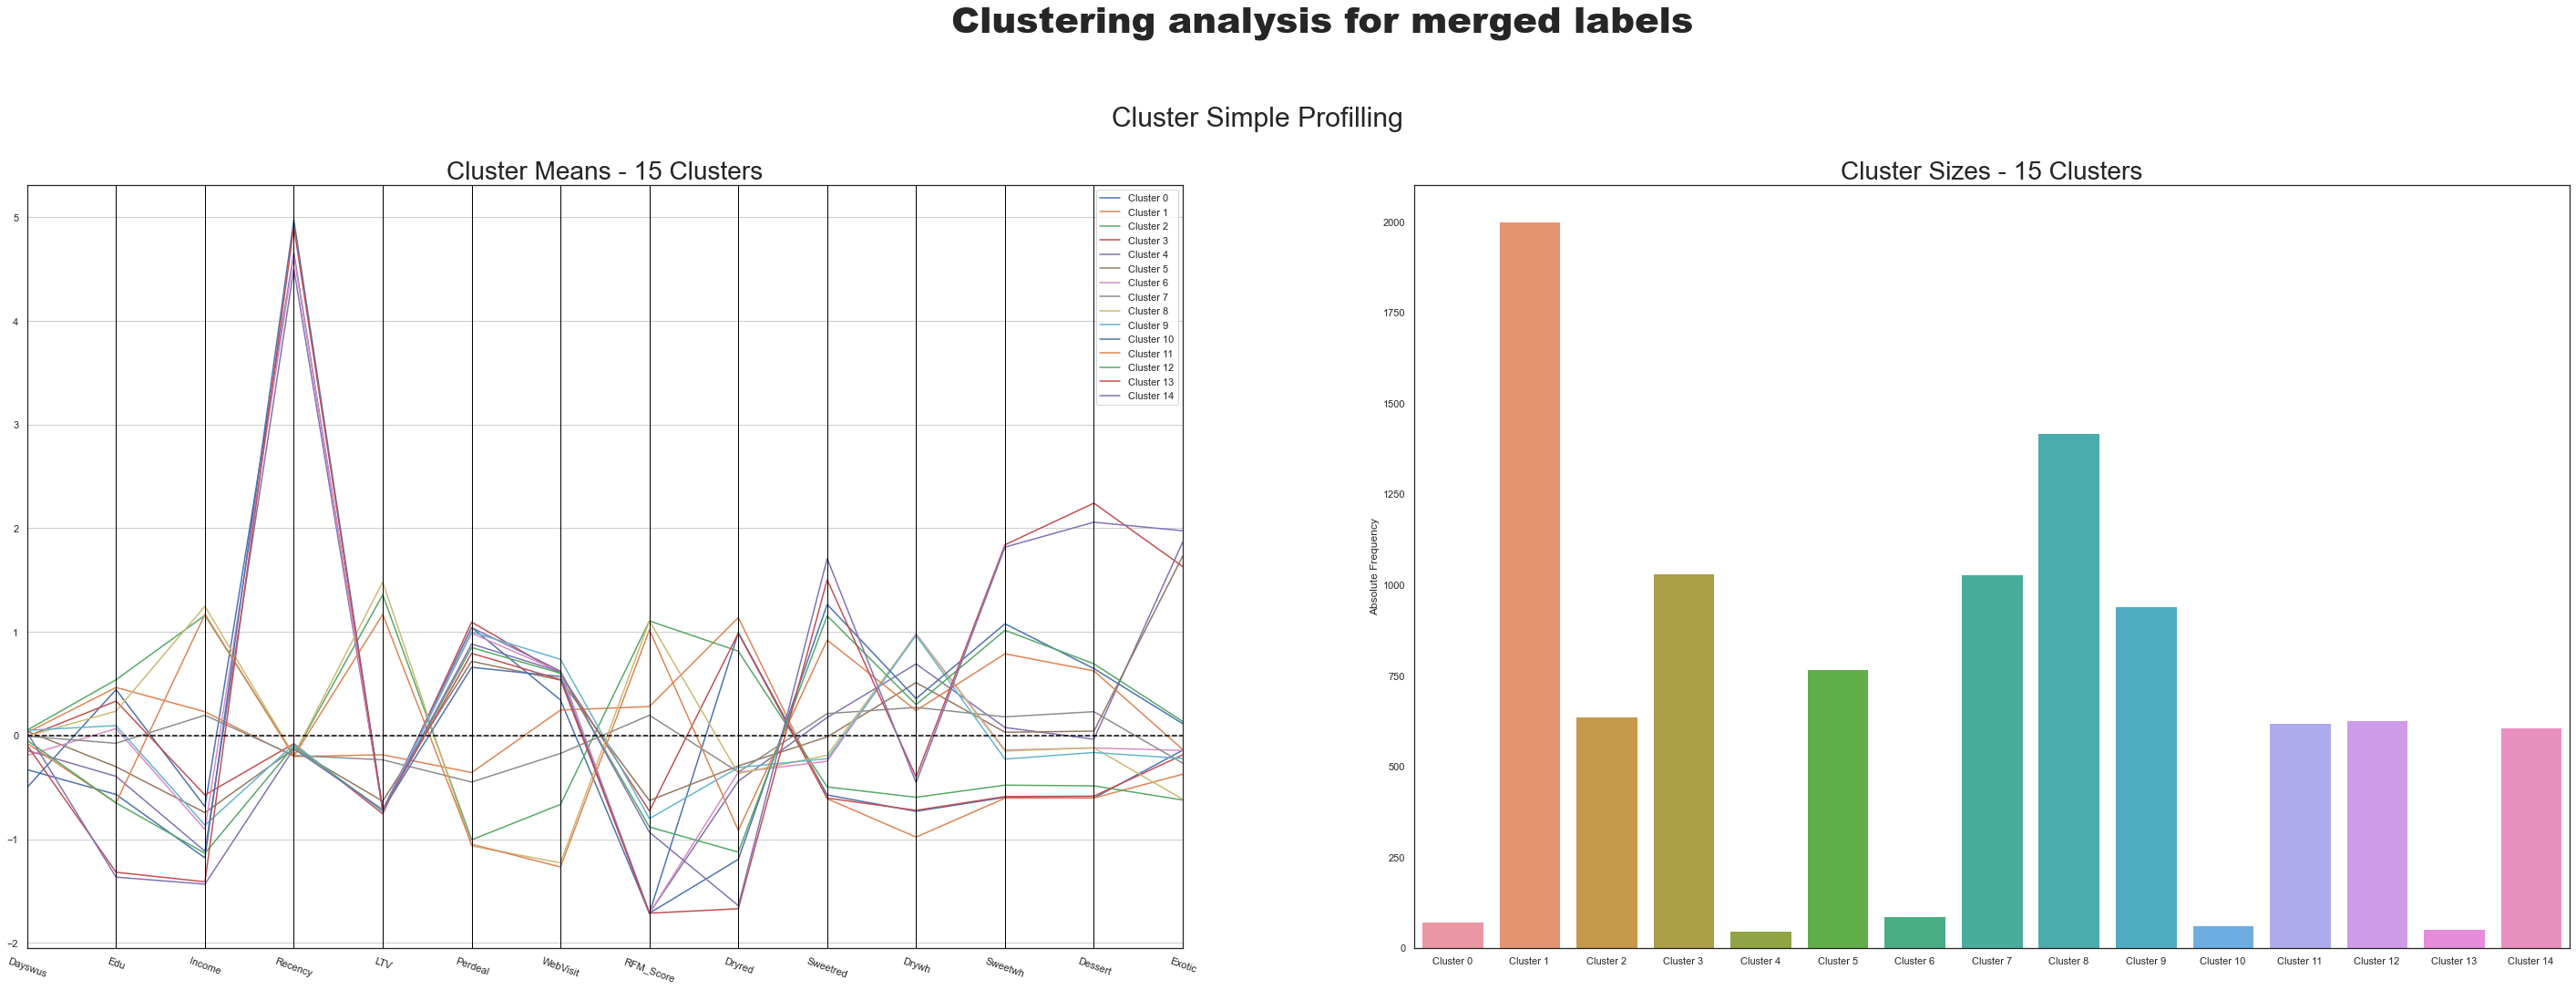

In [100]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_cluters.drop(columns=['taste_labels', 'info_labels']), 
    label_columns = ['merged_labels'], 
    figsize = (50, 15), 
    compar_titles = ["Clustering analysis for merged labels"]
)

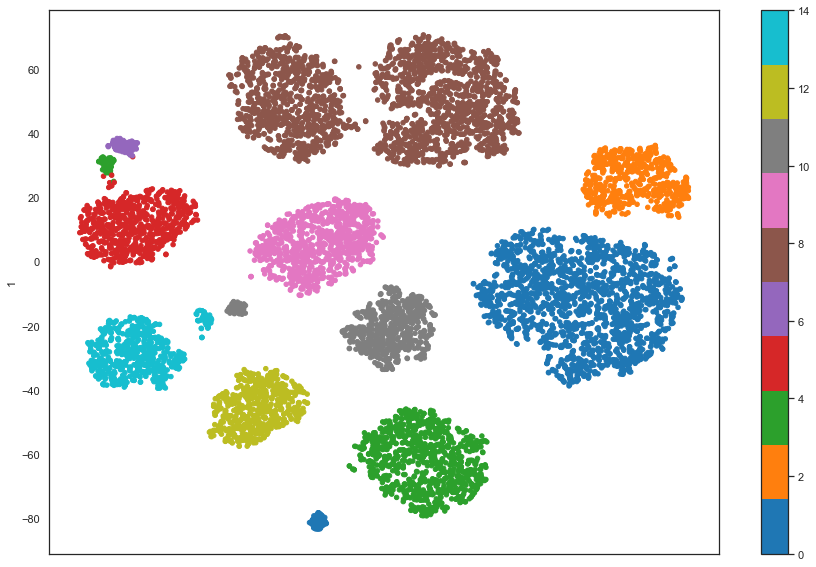

In [101]:
# t-SNE visualization 
two_dim = TSNE(random_state=42).fit_transform(df_cluters.drop(columns=['taste_labels', 'info_labels']))
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_cluters['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

In [102]:
df_final_solution=df_clean.copy()
df_final_solution=df_final_solution.reset_index(drop=True)
df_final_solution[['info_labels','taste_labels','merged_labels']] = df_cluters[['info_labels','taste_labels','merged_labels']]
df_final_solution

Dayswus  Age  Edu  Income  Freq  Recency  Monetary  LTV  Perdeal  \
0         789   68   16   90782    29       66      1402  699        3   
1         623   78   20  113023    31        6      1537  565        1   
2         583   24   18   28344     4       69        44   -3       66   
3         893   59   19   93571    21       10       888  207       12   
4        1062   59   18   91852    25       26      1138  355        5   
...       ...  ...  ...     ...   ...      ...       ...  ...      ...   
9995      967   28   17   54292    23       72      1011  436        7   
9996      637   76   15  125962    33       75      1668  476        3   
9997      586   69   19   99628    30       98      1469  618        2   
9998      598   65   14  111018    28        4      1350  739        4   
9999      771   20   14   26385     4       24        46   -3       68   

      Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  WebPurchase  \
0         37         5     44       10        3       2           19   
1         55         1     38        4        2       2            9   
2         32        19     24        1       24      63           59   
3         60        10     19        6        5      15           35   
4         59         5     28        4        4      19           34   
...      ...       ...    ...      ...      ...     ...          ...   
9995      41        11     36        1       11      42           31   
9996      61         2     25        5        6       1           45   
9997      46         0     29       11       14       4           18   
9998      48        16     27        8        1       8           36   
9999       5        13     21       46       15      63           52   

      WebVisit  info_labels  taste_labels  merged_labels  
0            4            2             2              8  
1            1            2             2              8  
2            7            3             4             14  
3            5            1             0              1  
4            6            1             0              1  
...        ...          ...           ...            ...  
9995         6            3             1              5  
9996         5            2             0              2  
9997         3            2             2              8  
9998         4            2             2              8  
9999         5            3             4             14  

[10000 rows x 20 columns]

In [103]:
c0=df_final_solution[df_final_solution['merged_labels']==0]
c1=df_final_solution[df_final_solution['merged_labels']==1]
c2=df_final_solution[df_final_solution['merged_labels']==2]
c3=df_final_solution[df_final_solution['merged_labels']==3]
c4=df_final_solution[df_final_solution['merged_labels']==4]
c5=df_final_solution[df_final_solution['merged_labels']==5]
c6=df_final_solution[df_final_solution['merged_labels']==6]
c7=df_final_solution[df_final_solution['merged_labels']==7]
c8=df_final_solution[df_final_solution['merged_labels']==8]
c9=df_final_solution[df_final_solution['merged_labels']==9]
c10=df_final_solution[df_final_solution['merged_labels']==10]
c11=df_final_solution[df_final_solution['merged_labels']==11]
c12=df_final_solution[df_final_solution['merged_labels']==12]
c13=df_final_solution[df_final_solution['merged_labels']==13]
c14=df_final_solution[df_final_solution['merged_labels']==14]

In [104]:
c0.describe()

Dayswus        Age        Edu        Income  Freq     Recency  \
count    72.000000  72.000000  72.000000     72.000000  72.0   72.000000   
mean    796.750000  39.319444  17.569444  50948.083333   1.0  387.680556   
std     174.682307   7.861166   1.651516  12204.753105   0.0   88.014216   
min     555.000000  23.000000  14.000000  20185.000000   1.0  220.000000   
25%     645.750000  34.750000  17.000000  44005.250000   1.0  329.750000   
50%     786.000000  39.500000  18.000000  50407.500000   1.0  401.000000   
75%     913.750000  45.000000  19.000000  60434.750000   1.0  440.750000   
max    1186.000000  54.000000  20.000000  72621.000000   1.0  543.000000   

        Monetary        LTV    Perdeal     Dryred   Sweetred      Drywh  \
count  72.000000  72.000000  72.000000  72.000000  72.000000  72.000000   
mean   16.708333  -1.430556  61.444444  73.638889   2.541667  19.319444   
std     3.437316   3.161504  21.724192   8.685921   2.867681   5.971355   
min     8.000000  -8.000000   8.000000  55.000000   0.000000   5.000000   
25%    14.000000  -4.000000  40.500000  67.000000   1.000000  14.750000   
50%    19.000000  -2.000000  64.500000  72.500000   2.000000  20.000000   
75%    19.000000   1.000000  80.250000  80.250000   3.000000  23.250000   
max    20.000000   7.000000  94.000000  95.000000  18.000000  29.000000   

         Sweetwh    Dessert     Exotic  WebPurchase   WebVisit  info_labels  \
count  72.000000  72.000000  72.000000    72.000000  72.000000         72.0   
mean    2.291667   2.194444  14.097222    55.263889   6.013889          0.0   
std     1.818818   2.311264  10.808395     9.269051   1.438828          0.0   
min     0.000000   0.000000   1.000000    29.000000   3.000000          0.0   
25%     1.000000   1.000000   6.000000    49.750000   5.000000          0.0   
50%     2.000000   2.000000  10.000000    55.000000   6.000000          0.0   
75%     3.000000   3.000000  21.250000    61.000000   7.000000          0.0   
max    10.000000  12.000000  48.000000    75.000000   9.000000          0.0   

       taste_labels  merged_labels  
count          72.0           72.0  
mean            0.0            0.0  
std             0.0            0.0  
min             0.0            0.0  
25%             0.0            0.0  
50%             0.0            0.0  
75%             0.0            0.0  
max             0.0            0.0

In [105]:
c1.describe()

Dayswus          Age          Edu         Income         Freq  \
count  2001.00000  2001.000000  2001.000000    2001.000000  2001.000000   
mean    903.88006    51.754623    17.608696   76224.855072    15.498751   
std     201.26274     7.815706     1.653271   11787.543474     6.804199   
min     550.00000    25.000000    14.000000   33606.000000     1.000000   
25%     729.00000    47.000000    16.000000   68331.000000    10.000000   
50%     898.00000    51.000000    18.000000   76298.000000    15.000000   
75%    1080.00000    57.000000    19.000000   83861.000000    20.000000   
max    1249.00000    78.000000    20.000000  120132.000000    39.000000   

           Recency     Monetary          LTV      Perdeal       Dryred  \
count  2001.000000  2001.000000  2001.000000  2001.000000  2001.000000   
mean     48.215892   608.045977   154.736132    22.424288    77.062469   
std      28.956370   362.905219   132.196170    13.320000    10.447899   
min       0.000000    16.000000  -124.000000     1.000000    53.000000   
25%      23.000000   306.000000    49.000000    12.000000    69.000000   
50%      48.000000   547.000000   123.000000    20.000000    78.000000   
75%      73.000000   839.000000   236.000000    30.000000    86.000000   
max     100.000000  2039.000000   665.000000    72.000000    99.000000   

          Sweetred        Drywh      Sweetwh      Dessert       Exotic  \
count  2001.000000  2001.000000  2001.000000  2001.000000  2001.000000   
mean      2.253873    16.189405     2.223388     2.197401    10.110445   
std       2.572065     6.681213     2.494509     2.466072     9.564638   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       1.000000    11.000000     1.000000     1.000000     3.000000   
50%       1.000000    16.000000     1.000000     1.000000     7.000000   
75%       3.000000    21.000000     3.000000     3.000000    14.000000   
max      21.000000    33.000000    19.000000    20.000000    56.000000   

       WebPurchase     WebVisit  info_labels  taste_labels  merged_labels  
count  2001.000000  2001.000000       2001.0        2001.0         2001.0  
mean     45.470765     5.789105          1.0           0.0            1.0  
std      11.510833     1.709240          0.0           0.0            0.0  
min      11.000000     1.000000          1.0           0.0            1.0  
25%      37.000000     5.000000          1.0           0.0            1.0  
50%      46.000000     6.000000          1.0           0.0            1.0  
75%      54.000000     7.000000          1.0           0.0            1.0  
max      78.000000     9.000000          1.0           0.0            1.0

In [106]:
c2.describe()

Dayswus         Age         Edu         Income        Freq  \
count   637.000000  637.000000  637.000000     637.000000  637.000000   
mean    908.590267   66.448980   17.748823  101890.864992   30.310832   
std     204.082307    6.854232    1.618394   11607.906351    7.205481   
min     551.000000   48.000000   14.000000   71196.000000   12.000000   
25%     718.000000   61.000000   16.000000   93733.000000   26.000000   
50%     917.000000   66.000000   18.000000  101171.000000   30.000000   
75%    1084.000000   73.000000   19.000000  109918.000000   35.000000   
max    1249.000000   78.000000   20.000000  136922.000000   56.000000   

          Recency     Monetary          LTV     Perdeal      Dryred  \
count  637.000000   637.000000   637.000000  637.000000  637.000000   
mean    49.174254  1488.883830   605.215071    4.335950   69.452119   
std     28.832897   454.979804   245.533822    4.065909    8.366580   
min      0.000000   394.000000   114.000000    0.000000   53.000000   
25%     24.000000  1205.000000   430.000000    1.000000   63.000000   
50%     49.000000  1465.000000   568.000000    3.000000   68.000000   
75%     74.000000  1787.000000   749.000000    6.000000   75.000000   
max    100.000000  3052.000000  1791.000000   24.000000   95.000000   

         Sweetred       Drywh     Sweetwh     Dessert      Exotic  \
count  637.000000  637.000000  637.000000  637.000000  637.000000   
mean     3.150706   21.023548    3.230769    3.120879    5.808477   
std      2.675163    5.938448    2.978190    2.956629    5.946913   
min      0.000000    4.000000    0.000000    0.000000    0.000000   
25%      1.000000   17.000000    1.000000    1.000000    2.000000   
50%      2.000000   22.000000    2.000000    2.000000    4.000000   
75%      4.000000   26.000000    5.000000    4.000000    8.000000   
max     16.000000   33.000000   18.000000   20.000000   41.000000   

       WebPurchase    WebVisit  info_labels  taste_labels  merged_labels  
count   637.000000  637.000000        637.0         637.0          637.0  
mean     26.108320    3.667190          2.0           0.0            2.0  
std      11.991974    1.850312          0.0           0.0            0.0  
min       5.000000    1.000000          2.0           0.0            2.0  
25%      15.000000    2.000000          2.0           0.0            2.0  
50%      25.000000    3.000000          2.0           0.0            2.0  
75%      35.000000    5.000000          2.0           0.0            2.0  
max      62.000000    9.000000          2.0           0.0            2.0

In [107]:
c3.describe()

Dayswus          Age          Edu        Income         Freq  \
count  1031.000000  1031.000000  1031.000000   1031.000000  1031.000000   
mean    896.183317    39.978661    17.361785  54057.220175     5.336566   
std     199.788491     6.954326     1.692374  11780.372105     3.681522   
min     550.000000    20.000000    14.000000  18726.000000     1.000000   
25%     724.000000    36.000000    16.000000  46043.500000     3.000000   
50%     899.000000    40.000000    17.000000  54871.000000     4.000000   
75%    1069.000000    45.000000    19.000000  62188.500000     7.000000   
max    1248.000000    73.000000    20.000000  89745.000000    24.000000   

           Recency     Monetary          LTV      Perdeal       Dryred  \
count  1031.000000  1031.000000  1031.000000  1031.000000  1031.000000   
mean     56.905917   138.139670   -11.560621    62.905917    73.524733   
std      33.867788   142.734691    25.971679    17.017178     9.325147   
min       0.000000    10.000000  -178.000000    13.000000    53.000000   
25%      31.000000    42.000000   -19.000000    51.000000    66.000000   
50%      58.000000    73.000000    -7.000000    65.000000    73.000000   
75%      81.000000   187.000000     0.000000    76.000000    81.000000   
max     209.000000  1073.000000    87.000000    94.000000    96.000000   

          Sweetred        Drywh      Sweetwh      Dessert       Exotic  \
count  1031.000000  1031.000000  1031.000000  1031.000000  1031.000000   
mean      2.305529    19.440349     2.350145     2.337536    13.323957   
std       2.381718     6.710236     2.505644     2.430497    10.038557   
min       0.000000     3.000000     0.000000     0.000000     0.000000   
25%       1.000000    14.000000     1.000000     1.000000     5.000000   
50%       2.000000    20.000000     2.000000     2.000000    10.000000   
75%       3.000000    25.000000     3.000000     3.000000    19.500000   
max      15.000000    34.000000    18.000000    21.000000    55.000000   

       WebPurchase     WebVisit  info_labels  taste_labels  merged_labels  
count  1031.000000  1031.000000       1031.0        1031.0         1031.0  
mean     54.171678     6.604268          3.0           0.0            3.0  
std       9.543290     1.474226          0.0           0.0            0.0  
min      25.000000     1.000000          3.0           0.0            3.0  
25%      47.000000     6.000000          3.0           0.0            3.0  
50%      54.000000     7.000000          3.0           0.0            3.0  
75%      61.000000     8.000000          3.0           0.0            3.0  
max      80.000000    10.000000          3.0           0.0            3.0

In [108]:
c4.describe()

Dayswus        Age       Edu        Income  Freq     Recency  \
count    48.000000  48.000000  48.00000     48.000000  48.0   48.000000   
mean    869.020833  30.854167  16.00000  39070.833333   1.0  376.833333   
std     177.694274   6.690704   1.45865  12550.265569   0.0   95.609875   
min     557.000000  19.000000  13.00000  15357.000000   1.0  218.000000   
25%     729.500000  26.750000  15.00000  32168.750000   1.0  291.500000   
50%     882.000000  29.500000  16.00000  38972.500000   1.0  392.000000   
75%     997.250000  35.000000  17.00000  49075.250000   1.0  452.250000   
max    1198.000000  46.000000  19.00000  64813.000000   1.0  537.000000   

        Monetary        LTV    Perdeal     Dryred   Sweetred      Drywh  \
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
mean   15.625000  -1.187500  61.416667  40.062500   8.416667  37.208333   
std     3.982007   2.540366  20.952665  15.991229   6.357550  11.932360   
min     8.000000  -6.000000   5.000000  11.000000   0.000000  17.000000   
25%    11.750000  -3.000000  47.750000  30.000000   3.750000  29.750000   
50%    17.000000  -1.000000  68.000000  42.000000   7.000000  36.000000   
75%    19.000000   0.000000  77.250000  54.250000  11.000000  44.000000   
max    20.000000   7.000000  93.000000  67.000000  28.000000  65.000000   

         Sweetwh    Dessert     Exotic  WebPurchase   WebVisit  info_labels  \
count  48.000000  48.000000  48.000000    48.000000  48.000000         48.0   
mean    7.687500   6.666667  48.770833    57.854167   6.666667          0.0   
std     5.857006   5.427798  13.377084     9.155837   1.357929          0.0   
min     0.000000   0.000000  28.000000    33.000000   4.000000          0.0   
25%     4.000000   3.000000  36.750000    53.000000   6.000000          0.0   
50%     6.000000   4.500000  47.000000    59.500000   7.000000          0.0   
75%     9.250000   9.000000  58.250000    63.250000   8.000000          0.0   
max    31.000000  25.000000  84.000000    73.000000   9.000000          0.0   

       taste_labels  merged_labels  
count          48.0           48.0  
mean            1.0            4.0  
std             0.0            0.0  
min             1.0            4.0  
25%             1.0            4.0  
50%             1.0            4.0  
75%             1.0            4.0  
max             1.0            4.0

In [109]:
c5.describe()

Dayswus         Age         Edu        Income        Freq  \
count   768.000000  768.000000  768.000000    768.000000  768.000000   
mean    906.403646   35.158854   16.173177  49365.138021    6.160156   
std     202.926146   10.005645    1.631649  16954.813299    5.376236   
min     550.000000   18.000000   12.000000  10000.000000    1.000000   
25%     741.500000   28.000000   15.000000  38138.000000    3.000000   
50%     902.000000   33.000000   16.000000  48261.000000    4.000000   
75%    1076.000000   40.000000   17.000000  59514.250000    8.000000   
max    1248.000000   72.000000   20.000000  98117.000000   26.000000   

          Recency     Monetary         LTV     Perdeal      Dryred  \
count  768.000000   768.000000  768.000000  768.000000  768.000000   
mean    53.322917   177.316406   24.057292   52.361979   43.497396   
std     34.440242   236.634575   76.523530   23.729554   15.907654   
min      0.000000     9.000000 -168.000000    3.000000    4.000000   
25%     28.000000    37.000000   -6.000000   33.000000   32.000000   
50%     51.000000    65.500000   -2.000000   54.000000   44.000000   
75%     77.000000   217.000000   12.250000   72.000000   55.250000   
max    213.000000  1220.000000  476.000000   97.000000   89.000000   

         Sweetred       Drywh     Sweetwh     Dessert      Exotic  \
count  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     6.946615   34.944010    7.321615    7.278646   46.401042   
std      5.154562   10.722565    5.402153    5.641434   13.712758   
min      0.000000    9.000000    0.000000    0.000000   25.000000   
25%      3.000000   27.000000    3.000000    3.000000   36.000000   
50%      6.000000   35.000000    6.000000    6.000000   43.000000   
75%     10.000000   42.000000   10.000000   11.000000   56.000000   
max     29.000000   72.000000   32.000000   32.000000   94.000000   

       WebPurchase    WebVisit  info_labels  taste_labels  merged_labels  
count   768.000000  768.000000        768.0         768.0          768.0  
mean     54.401042    6.462240          3.0           1.0            5.0  
std      12.336254    1.677718          0.0           0.0            0.0  
min      16.000000    2.000000          3.0           1.0            5.0  
25%      47.000000    5.000000          3.0           1.0            5.0  
50%      56.000000    7.000000          3.0           1.0            5.0  
75%      63.000000    8.000000          3.0           1.0            5.0  
max      88.000000   10.000000          3.0           1.0            5.0

In [110]:
c6.describe()

Dayswus        Age        Edu        Income  Freq     Recency  \
count    88.000000  88.000000  88.000000     88.000000  88.0   88.000000   
mean    859.272727  32.272727  16.863636  44894.397727   1.0  386.056818   
std     201.541002   6.003308   1.723281  11525.203549   0.0   98.202975   
min     555.000000  22.000000  14.000000  23209.000000   1.0  218.000000   
25%     677.250000  28.000000  15.000000  35054.500000   1.0  297.000000   
50%     843.500000  30.000000  17.000000  46053.000000   1.0  393.000000   
75%    1003.750000  35.250000  18.000000  51828.250000   1.0  477.000000   
max    1249.000000  47.000000  20.000000  74425.000000   1.0  549.000000   

        Monetary        LTV    Perdeal     Dryred   Sweetred      Drywh  \
count  88.000000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean   16.897727  -1.079545  59.909091  42.079545   5.102273  40.875000   
std     3.230742   2.320432  17.897304  12.213824   3.493968   8.464683   
min     8.000000  -7.000000  18.000000  15.000000   0.000000  23.000000   
25%    14.750000  -2.000000  46.500000  33.000000   2.000000  34.000000   
50%    18.500000  -1.000000  61.000000  43.000000   5.000000  39.500000   
75%    19.000000   0.000000  73.250000  53.000000   7.000000  46.000000   
max    20.000000   7.000000  93.000000  60.000000  13.000000  62.000000   

         Sweetwh    Dessert     Exotic  WebPurchase   WebVisit  info_labels  \
count  88.000000  88.000000  88.000000    88.000000  88.000000         88.0   
mean    5.943182   6.000000  14.056818    58.556818   6.647727          0.0   
std     4.347963   4.966555   7.420627    10.746673   1.668090          0.0   
min     0.000000   0.000000   1.000000    29.000000   2.000000          0.0   
25%     3.000000   2.000000   8.000000    50.000000   6.000000          0.0   
50%     5.000000   5.000000  13.000000    60.000000   7.000000          0.0   
75%     8.250000   8.250000  20.000000    68.000000   8.000000          0.0   
max    21.000000  23.000000  29.000000    76.000000   9.000000          0.0   

       taste_labels  merged_labels  
count          88.0           88.0  
mean            2.0            6.0  
std             0.0            0.0  
min             2.0            6.0  
25%             2.0            6.0  
50%             2.0            6.0  
75%             2.0            6.0  
max             2.0            6.0

In [111]:
c7.describe()

Dayswus          Age          Edu         Income         Freq  \
count  1029.000000  1029.000000  1029.000000    1029.000000  1029.000000   
mean    896.645287    51.262391    16.598639   75299.755102    14.260447   
std     202.087192    11.972454     1.678207   14507.678911     6.608287   
min     550.000000    19.000000    13.000000   30385.000000     1.000000   
25%     727.000000    43.000000    15.000000   66230.000000    10.000000   
50%     887.000000    55.000000    16.000000   77289.000000    14.000000   
75%    1073.000000    60.000000    18.000000   85348.000000    19.000000   
max    1248.000000    77.000000    20.000000  121029.000000    35.000000   

           Recency     Monetary          LTV      Perdeal       Dryred  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean     48.959184   542.495627   140.539359    19.871720    42.102041   
std      28.933983   341.807987   117.625617    12.481779    11.658161   
min       0.000000    17.000000  -107.000000     1.000000     3.000000   
25%      24.000000   295.000000    48.000000    11.000000    35.000000   
50%      48.000000   494.000000   116.000000    17.000000    44.000000   
75%      73.000000   764.000000   208.000000    26.000000    52.000000   
max     100.000000  1794.000000   657.000000    73.000000    62.000000   

          Sweetred        Drywh      Sweetwh      Dessert       Exotic  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000   
mean      8.716229    31.927114     8.512148     8.757046    11.947522   
std       7.419420     9.218359     6.947629     7.048695    10.124092   
min       0.000000     7.000000     0.000000     0.000000     0.000000   
25%       3.000000    26.000000     3.000000     4.000000     5.000000   
50%       7.000000    32.000000     7.000000     7.000000     9.000000   
75%      12.000000    38.000000    12.000000    12.000000    16.000000   
max      58.000000    74.000000    46.000000    46.000000    87.000000   

       WebPurchase     WebVisit  info_labels  taste_labels  merged_labels  
count  1029.000000  1029.000000       1029.0        1029.0         1029.0  
mean     39.270165     4.813411          1.0           2.0            7.0  
std      12.558226     1.853636          0.0           0.0            0.0  
min       7.000000     0.000000          1.0           2.0            7.0  
25%      30.000000     3.000000          1.0           2.0            7.0  
50%      38.000000     5.000000          1.0           2.0            7.0  
75%      47.000000     6.000000          1.0           2.0            7.0  
max      79.000000     9.000000          1.0           2.0            7.0

In [112]:
c8.describe()

Dayswus          Age          Edu         Income         Freq  \
count  1417.000000  1417.000000  1417.000000    1417.000000  1417.000000   
mean    896.933663    70.048694    17.179958  104339.947071    31.226535   
std     204.215091     5.436176     1.656419   11475.434618     7.429056   
min     550.000000    43.000000    14.000000   72110.000000    12.000000   
25%     723.000000    67.000000    16.000000   96033.000000    26.000000   
50%     889.000000    71.000000    17.000000  104123.000000    31.000000   
75%    1079.000000    74.000000    19.000000  111771.000000    36.000000   
max    1250.000000    78.000000    20.000000  140628.000000    54.000000   

           Recency     Monetary          LTV      Perdeal       Dryred  \
count  1417.000000  1417.000000  1417.000000  1417.000000  1417.000000   
mean     49.214538  1547.026817   641.482004     2.674665    41.776288   
std      29.147113   469.778989   256.062076     2.889566    10.975000   
min       0.000000   395.000000   129.000000     0.000000    11.000000   
25%      24.000000  1214.000000   456.000000     1.000000    34.000000   
50%      49.000000  1533.000000   603.000000     2.000000    43.000000   
75%      74.000000  1859.000000   797.000000     3.000000    50.000000   
max     100.000000  2938.000000  1608.000000    24.000000    63.000000   

          Sweetred        Drywh      Sweetwh      Dessert       Exotic  \
count  1417.000000  1417.000000  1417.000000  1417.000000  1417.000000   
mean      5.555399    40.769936     5.865914     6.013409     5.930840   
std       3.764604     8.902604     4.157775     4.496133     5.560607   
min       0.000000    21.000000     0.000000     0.000000     0.000000   
25%       3.000000    34.000000     3.000000     3.000000     2.000000   
50%       5.000000    40.000000     5.000000     5.000000     4.000000   
75%       8.000000    47.000000     8.000000     8.000000     8.000000   
max      22.000000    74.000000    25.000000    33.000000    31.000000   

       WebPurchase    WebVisit  info_labels  taste_labels  merged_labels  
count  1417.000000  1417.00000       1417.0        1417.0         1417.0  
mean     16.971066     2.35427          2.0           2.0            8.0  
std       8.152147     1.37218          0.0           0.0            0.0  
min       4.000000     0.00000          2.0           2.0            8.0  
25%      12.000000     1.00000          2.0           2.0            8.0  
50%      15.000000     2.00000          2.0           2.0            8.0  
75%      19.000000     3.00000          2.0           2.0            8.0  
max      63.000000     8.00000          2.0           2.0            8.0

In [113]:
c9.describe()

Dayswus         Age         Edu        Income        Freq  \
count   941.000000  941.000000  941.000000    941.000000  941.000000   
mean    908.199787   32.707758   16.918172  46012.235919    4.683316   
std     199.610031    6.460241    1.642099  12463.180364    3.167257   
min     550.000000   21.000000   14.000000  11474.000000    1.000000   
25%     739.000000   28.000000   16.000000  37953.000000    3.000000   
50%     914.000000   32.000000   17.000000  46252.000000    4.000000   
75%    1081.000000   37.000000   18.000000  54158.000000    5.000000   
max    1248.000000   61.000000   20.000000  80265.000000   21.000000   

          Recency    Monetary         LTV     Perdeal      Dryred    Sweetred  \
count  941.000000  941.000000  941.000000  941.000000  941.000000  941.000000   
mean    56.358130  109.616366   -4.928799   60.258236   43.130712    5.299681   
std     34.731743  120.390873   18.934608   17.662927   11.654098    3.756624   
min      0.000000    8.000000 -147.000000   14.000000    8.000000    0.000000   
25%     30.000000   40.000000  -10.000000   48.000000   35.000000    2.000000   
50%     56.000000   63.000000   -4.000000   61.000000   45.000000    5.000000   
75%     80.000000  122.000000    1.000000   75.000000   53.000000    8.000000   
max    221.000000  902.000000  149.000000   96.000000   63.000000   21.000000   

            Drywh     Sweetwh     Dessert      Exotic  WebPurchase  \
count  941.000000  941.000000  941.000000  941.000000   941.000000   
mean    40.668438    5.246546    5.653560   12.724761    57.720510   
std      8.930974    3.918695    4.267525    7.433658    10.189977   
min     17.000000    0.000000    0.000000    1.000000    25.000000   
25%     34.000000    2.000000    2.000000    7.000000    51.000000   
50%     39.000000    4.000000    5.000000   12.000000    59.000000   
75%     46.000000    7.000000    8.000000   18.000000    65.000000   
max     73.000000   24.000000   28.000000   36.000000    84.000000   

         WebVisit  info_labels  taste_labels  merged_labels  
count  941.000000        941.0         941.0          941.0  
mean     6.927736          3.0           2.0            9.0  
std      1.464141          0.0           0.0            0.0  
min      2.000000          3.0           2.0            9.0  
25%      6.000000          3.0           2.0            9.0  
50%      7.000000          3.0           2.0            9.0  
75%      8.000000          3.0           2.0            9.0  
max      9.000000          3.0           2.0            9.0

In [114]:
c10.describe()

Dayswus        Age        Edu        Income  Freq     Recency  \
count    61.000000  61.000000  61.000000     61.000000  61.0   61.000000   
mean    831.311475  26.049180  15.672131  37311.901639   1.0  410.114754   
std     204.373232   6.936441   1.513509  13543.653049   0.0   87.658066   
min     577.000000  18.000000  12.000000  10000.000000   1.0  222.000000   
25%     652.000000  22.000000  15.000000  27957.000000   1.0  337.000000   
50%     777.000000  24.000000  16.000000  35667.000000   1.0  426.000000   
75%     977.000000  30.000000  17.000000  45894.000000   1.0  482.000000   
max    1246.000000  54.000000  19.000000  80242.000000   1.0  547.000000   

        Monetary        LTV    Perdeal     Dryred   Sweetred      Drywh  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean   15.786885   0.081967  50.737705  22.360656  17.000000  33.000000   
std     3.795237   1.837526  18.992895  10.220947   9.384384   9.835311   
min     7.000000  -4.000000  16.000000   6.000000   0.000000  14.000000   
25%    13.000000  -1.000000  33.000000  15.000000  10.000000  26.000000   
50%    16.000000   0.000000  50.000000  20.000000  17.000000  34.000000   
75%    19.000000   1.000000  67.000000  28.000000  23.000000  41.000000   
max    20.000000   4.000000  85.000000  50.000000  38.000000  50.000000   

         Sweetwh    Dessert     Exotic  WebPurchase   WebVisit  info_labels  \
count  61.000000  61.000000  61.000000    61.000000  61.000000         61.0   
mean   15.704918  12.032787  18.508197    57.311475   6.540984          0.0   
std     9.496217   6.840973  10.422129    11.298290   1.555354          0.0   
min     0.000000   0.000000   2.000000    29.000000   2.000000          0.0   
25%     8.000000   7.000000  12.000000    54.000000   6.000000          0.0   
50%    14.000000  12.000000  17.000000    59.000000   7.000000          0.0   
75%    21.000000  16.000000  25.000000    65.000000   8.000000          0.0   
max    41.000000  28.000000  45.000000    79.000000   9.000000          0.0   

       taste_labels  merged_labels  
count          61.0           61.0  
mean            3.0           10.0  
std             0.0            0.0  
min             3.0           10.0  
25%             3.0           10.0  
50%             3.0           10.0  
75%             3.0           10.0  
max             3.0           10.0

In [115]:
c11.describe()

Dayswus         Age         Edu         Income        Freq  \
count   620.000000  620.000000  620.000000     620.000000  620.000000   
mean    882.961290   68.045161   15.519355  102204.493548   28.070968   
std     204.160486    5.774818    1.335950   10379.275420    6.816885   
min     550.000000   48.000000   14.000000   72989.000000   12.000000   
25%     704.750000   65.000000   15.000000   94589.500000   23.000000   
50%     866.000000   68.000000   15.000000  102369.500000   28.000000   
75%    1050.000000   73.000000   16.000000  109408.750000   33.000000   
max    1250.000000   78.000000   20.000000  130572.000000   47.000000   

          Recency     Monetary          LTV     Perdeal      Dryred  \
count  620.000000   620.000000   620.000000  620.000000  620.000000   
mean    48.351613  1347.830645   549.917742    3.130645   28.904839   
std     28.769637   431.912801   222.849264    3.438454   11.615361   
min      0.000000   394.000000   142.000000    0.000000    6.000000   
25%     22.750000  1022.000000   379.750000    1.000000   20.000000   
50%     48.000000  1338.000000   518.500000    2.000000   28.000000   
75%     73.000000  1666.250000   696.250000    4.000000   37.000000   
max    100.000000  2530.000000  1430.000000   28.000000   67.000000   

         Sweetred       Drywh     Sweetwh     Dessert      Exotic  \
count  620.000000  620.000000  620.000000  620.000000  620.000000   
mean    14.293548   31.550000   13.383871   11.858065   14.214516   
std      7.868320    9.396786    8.335710    7.944833   13.371568   
min      0.000000    9.000000    0.000000    0.000000    0.000000   
25%      9.000000   25.000000    7.000000    6.000000    4.000000   
50%     14.000000   32.000000   12.000000   11.000000    9.000000   
75%     19.000000   38.000000   18.000000   16.000000   20.000000   
max     42.000000   57.000000   46.000000   48.000000   80.000000   

       WebPurchase    WebVisit  info_labels  taste_labels  merged_labels  
count   620.000000  620.000000        620.0         620.0          620.0  
mean     18.666129    2.261290          2.0           3.0           11.0  
std       9.342858    1.438941          0.0           0.0            0.0  
min       5.000000    0.000000          2.0           3.0           11.0  
25%      12.000000    1.000000          2.0           3.0           11.0  
50%      16.000000    2.000000          2.0           3.0           11.0  
75%      23.000000    3.000000          2.0           3.0           11.0  
max      59.000000    8.000000          2.0           3.0           11.0

In [116]:
c12.describe()

Dayswus         Age         Edu        Income        Freq  \
count   626.000000  626.000000  626.000000    626.000000  626.000000   
mean    888.616613   27.476038   15.519169  38543.022364    3.848243   
std     205.574543    7.866500    1.369537  13367.647572    2.279152   
min     550.000000   18.000000   12.000000  10000.000000    1.000000   
25%     712.000000   22.000000   15.000000  29162.750000    2.000000   
50%     875.000000   24.000000   15.000000  37854.000000    3.000000   
75%    1075.000000   32.000000   16.000000  46884.750000    5.000000   
max    1247.000000   60.000000   20.000000  83104.000000   14.000000   

          Recency    Monetary         LTV     Perdeal      Dryred    Sweetred  \
count  626.000000  626.000000  626.000000  626.000000  626.000000  626.000000   
mean    55.148562   76.434505   -0.761981   56.055911   24.001597   16.132588   
std     36.114777   77.528192   12.568248   19.906463   11.806913    8.424915   
min      0.000000    9.000000  -91.000000    8.000000    2.000000    0.000000   
25%     27.000000   32.000000   -6.000000   41.000000   14.250000   10.000000   
50%     53.000000   49.500000   -2.000000   56.000000   23.000000   15.500000   
75%     80.000000   88.750000    3.000000   72.000000   32.000000   22.000000   
max    222.000000  492.000000   75.000000   96.000000   55.000000   55.000000   

            Drywh     Sweetwh     Dessert      Exotic  WebPurchase  \
count  626.000000  626.000000  626.000000  626.000000   626.000000   
mean    32.263578   15.201278   12.399361   18.880192    55.605431   
std      9.653145    9.102847    7.659782    9.703114    12.154969   
min      7.000000    0.000000    0.000000    0.000000    24.000000   
25%     25.250000    9.000000    6.000000   11.000000    47.000000   
50%     32.500000   14.000000   11.000000   18.000000    58.000000   
75%     39.000000   20.000000   17.000000   26.000000    64.750000   
max     57.000000   54.000000   44.000000   48.000000    82.000000   

         WebVisit  info_labels  taste_labels  merged_labels  
count  626.000000        626.0         626.0          626.0  
mean     6.615016          3.0           3.0           12.0  
std      1.721496          0.0           0.0            0.0  
min      2.000000          3.0           3.0           12.0  
25%      6.000000          3.0           3.0           12.0  
50%      7.000000          3.0           3.0           12.0  
75%      8.000000          3.0           3.0           12.0  
max     10.000000          3.0           3.0           12.0

In [117]:
c13.describe()

Dayswus        Age        Edu        Income  Freq     Recency  \
count    53.000000  53.000000  53.000000     53.000000  53.0   53.000000   
mean    878.698113  21.509434  14.264151  30944.886792   1.0  405.226415   
std     195.147044   3.184232   1.273260   8984.744435   0.0   98.547459   
min     571.000000  18.000000  12.000000  10000.000000   1.0  226.000000   
25%     716.000000  19.000000  13.000000  25105.000000   1.0  317.000000   
50%     848.000000  20.000000  14.000000  32447.000000   1.0  423.000000   
75%    1067.000000  23.000000  15.000000  35516.000000   1.0  482.000000   
max    1221.000000  32.000000  17.000000  58450.000000   1.0  549.000000   

        Monetary        LTV    Perdeal     Dryred   Sweetred      Drywh  \
count  53.000000  53.000000  53.000000  53.000000  53.000000  53.000000   
mean   14.433962  -0.283019  54.509434  11.188679  18.867925  23.471698   
std     3.634818   1.884934  21.256332   6.469029  11.625631  10.259337   
min     8.000000  -6.000000  14.000000   2.000000   2.000000   5.000000   
25%    12.000000  -2.000000  39.000000   7.000000  10.000000  16.000000   
50%    13.000000   0.000000  54.000000   9.000000  17.000000  23.000000   
75%    19.000000   1.000000  73.000000  15.000000  25.000000  29.000000   
max    20.000000   3.000000  93.000000  32.000000  50.000000  46.000000   

         Sweetwh    Dessert     Exotic  WebPurchase   WebVisit  info_labels  \
count  53.000000  53.000000  53.000000    53.000000  53.000000         53.0   
mean   21.811321  24.603774  44.660377    56.622642   6.471698          0.0   
std    14.065857  11.601292  21.660797    10.481167   1.576312          0.0   
min     0.000000   0.000000   7.000000    29.000000   3.000000          0.0   
25%    13.000000  16.000000  27.000000    49.000000   5.000000          0.0   
50%    21.000000  26.000000  41.000000    58.000000   7.000000          0.0   
75%    29.000000  33.000000  60.000000    64.000000   8.000000          0.0   
max    61.000000  52.000000  92.000000    74.000000   9.000000          0.0   

       taste_labels  merged_labels  
count          53.0           53.0  
mean            4.0           13.0  
std             0.0            0.0  
min             4.0           13.0  
25%             4.0           13.0  
50%             4.0           13.0  
75%             4.0           13.0  
max             4.0           13.0

In [118]:
c14.describe()

Dayswus         Age         Edu        Income        Freq  \
count   608.000000  608.000000  608.000000    608.000000  608.000000   
mean    903.940789   21.560855   14.175987  30315.600329    3.722039   
std     205.770445    4.173690    1.440854  11146.205166    2.383367   
min     550.000000   18.000000   12.000000  10000.000000    1.000000   
25%     720.000000   19.000000   13.000000  22666.750000    2.000000   
50%     905.500000   20.000000   14.000000  29753.000000    3.000000   
75%    1080.500000   22.000000   15.000000  36322.750000    4.000000   
max    1249.000000   57.000000   20.000000  77884.000000   22.000000   

          Recency    Monetary         LTV     Perdeal      Dryred    Sweetred  \
count  608.000000  608.000000  608.000000  608.000000  608.000000  608.000000   
mean    53.493421   65.208882   -0.259868   57.019737   11.902961   20.483553   
std     35.096290   90.014794   13.012410   20.873581    7.644196   12.125092   
min      0.000000    6.000000 -117.000000    6.000000    1.000000    0.000000   
25%     24.750000   29.750000   -5.000000   41.000000    6.000000   11.000000   
50%     52.500000   41.000000   -2.000000   59.000000   10.000000   20.000000   
75%     79.000000   63.000000    2.000000   74.000000   15.000000   29.000000   
max    224.000000  947.000000  163.000000   96.000000   44.000000   75.000000   

            Drywh     Sweetwh     Dessert      Exotic  WebPurchase  \
count  608.000000  608.000000  608.000000  608.000000   608.000000   
mean    22.802632   21.631579   23.156250   50.606908    57.488487   
std      8.386299   12.397419   12.214459   20.139344    11.009051   
min      4.000000    0.000000    0.000000    7.000000    26.000000   
25%     17.000000   12.000000   15.000000   35.000000    51.000000   
50%     22.000000   21.000000   23.000000   50.000000    59.000000   
75%     28.250000   30.000000   30.000000   66.000000    65.250000   
max     46.000000   62.000000   77.000000   96.000000    82.000000   

         WebVisit  info_labels  taste_labels  merged_labels  
count  608.000000        608.0         608.0          608.0  
mean     6.649671          3.0           4.0           14.0  
std      1.566946          0.0           0.0            0.0  
min      2.000000          3.0           4.0           14.0  
25%      6.000000          3.0           4.0           14.0  
50%      7.000000          3.0           4.0           14.0  
75%      8.000000          3.0           4.0           14.0  
max      9.000000          3.0           4.0           14.0